#import ibraries

In [1]:
from IPython.core.display import clear_output
#import important libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as express
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import tensorflow as tf
!pip install tensorflow_addons
import tensorflow_addons as tfaAdamw
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from tqdm import tqdm
from keras import callbacks
from keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
clear_output()

In [2]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

In [3]:
pip install tensorflow-addons


Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_addons as tfaAdamw
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
from statistics import mean

In [5]:
train_data=pd.read_csv('train.csv')
test_data =pd.read_csv('test.csv')
val_data=pd.read_csv('val.csv')

# Data Exploratation

In [7]:
train_data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow


# ○ Number of instances per class


In [8]:
dict_train=train_data['Label'].value_counts()

In [9]:
dict_train

PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: Label, dtype: int64

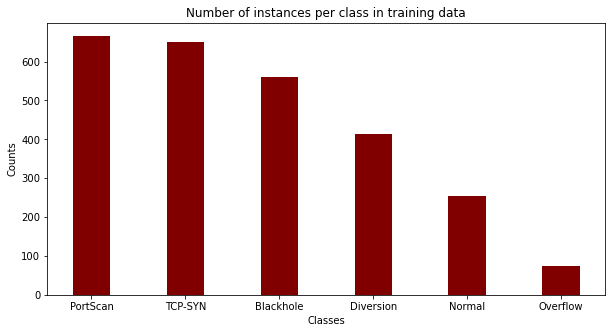

In [10]:
keys_tr = dict_train.keys()
values_tr =dict_train.values 
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(keys_tr, values_tr, color ='maroon',width = 0.4) 
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title('Number of instances per class in training data')
plt.show()

In [11]:
dict_val=val_data['Label'].value_counts()

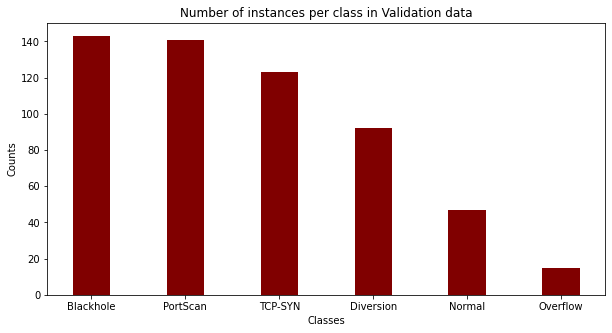

In [12]:
keys_val = dict_val.keys()
values_val =dict_val.values  
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(keys_val, values_val, color ='maroon',width = 0.4) 
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title('Number of instances per class in Validation data')
plt.show()

In [13]:
dict_test=test_data['Label'].value_counts()

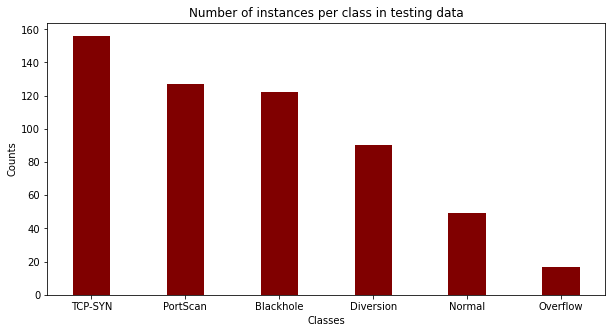

In [14]:
keys_tes = dict_test.keys()
values_tes =dict_test.values  
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(keys_tes, values_tes, color ='maroon',width = 0.4) 
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.title('Number of instances per class in testing data')
plt.show()

# ○ Number of null values per feature


In [15]:
train_data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

In [16]:
test_data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

In [17]:
val_data.isnull().sum()

Switch ID                        0
Port Number                      0
Received Packets                 0
Received Bytes                   0
Sent Bytes                       0
Sent Packets                     0
Port alive Duration (S)          0
Delta Received Packets           0
Delta Received Bytes             0
Delta Sent Bytes                 0
Delta Sent Packets               0
Delta Port alive Duration (S)    0
Connection Point                 0
Total Load/Rate                  0
Total Load/Latest                0
Unknown Load/Rate                0
Unknown Load/Latest              0
Latest bytes counter             0
Active Flow Entries              0
Packets Looked Up                0
Packets Matched                  0
Label                            0
dtype: int64

# ○ Number of possible outliers 


In [18]:
Q1_train=train_data.quantile(0.25)
Q3_train=train_data.quantile(0.75)
IQR_train= Q3_train -Q1_train 
((train_data < Q1_train -1.5*IQR_train) | (train_data > Q3_train +1.5*IQR_train)).sum()

C:\Users\admin\AppData\Local\Temp/ipykernel_11576/2720615035.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((train_data < Q1_train -1.5*IQR_train) | (train_data > Q3_train +1.5*IQR_train)).sum()


Active Flow Entries              152
Connection Point                   0
Delta Port alive Duration (S)    441
Delta Received Bytes             648
Delta Received Packets           649
Delta Sent Bytes                 604
Delta Sent Packets               604
Label                              0
Latest bytes counter             396
Packets Looked Up                536
Packets Matched                  536
Port Number                        0
Port alive Duration (S)            0
Received Bytes                   186
Received Packets                 312
Sent Bytes                       222
Sent Packets                     379
Switch ID                          0
Total Load/Latest                501
Total Load/Rate                  396
Unknown Load/Latest              501
Unknown Load/Rate                396
dtype: int64

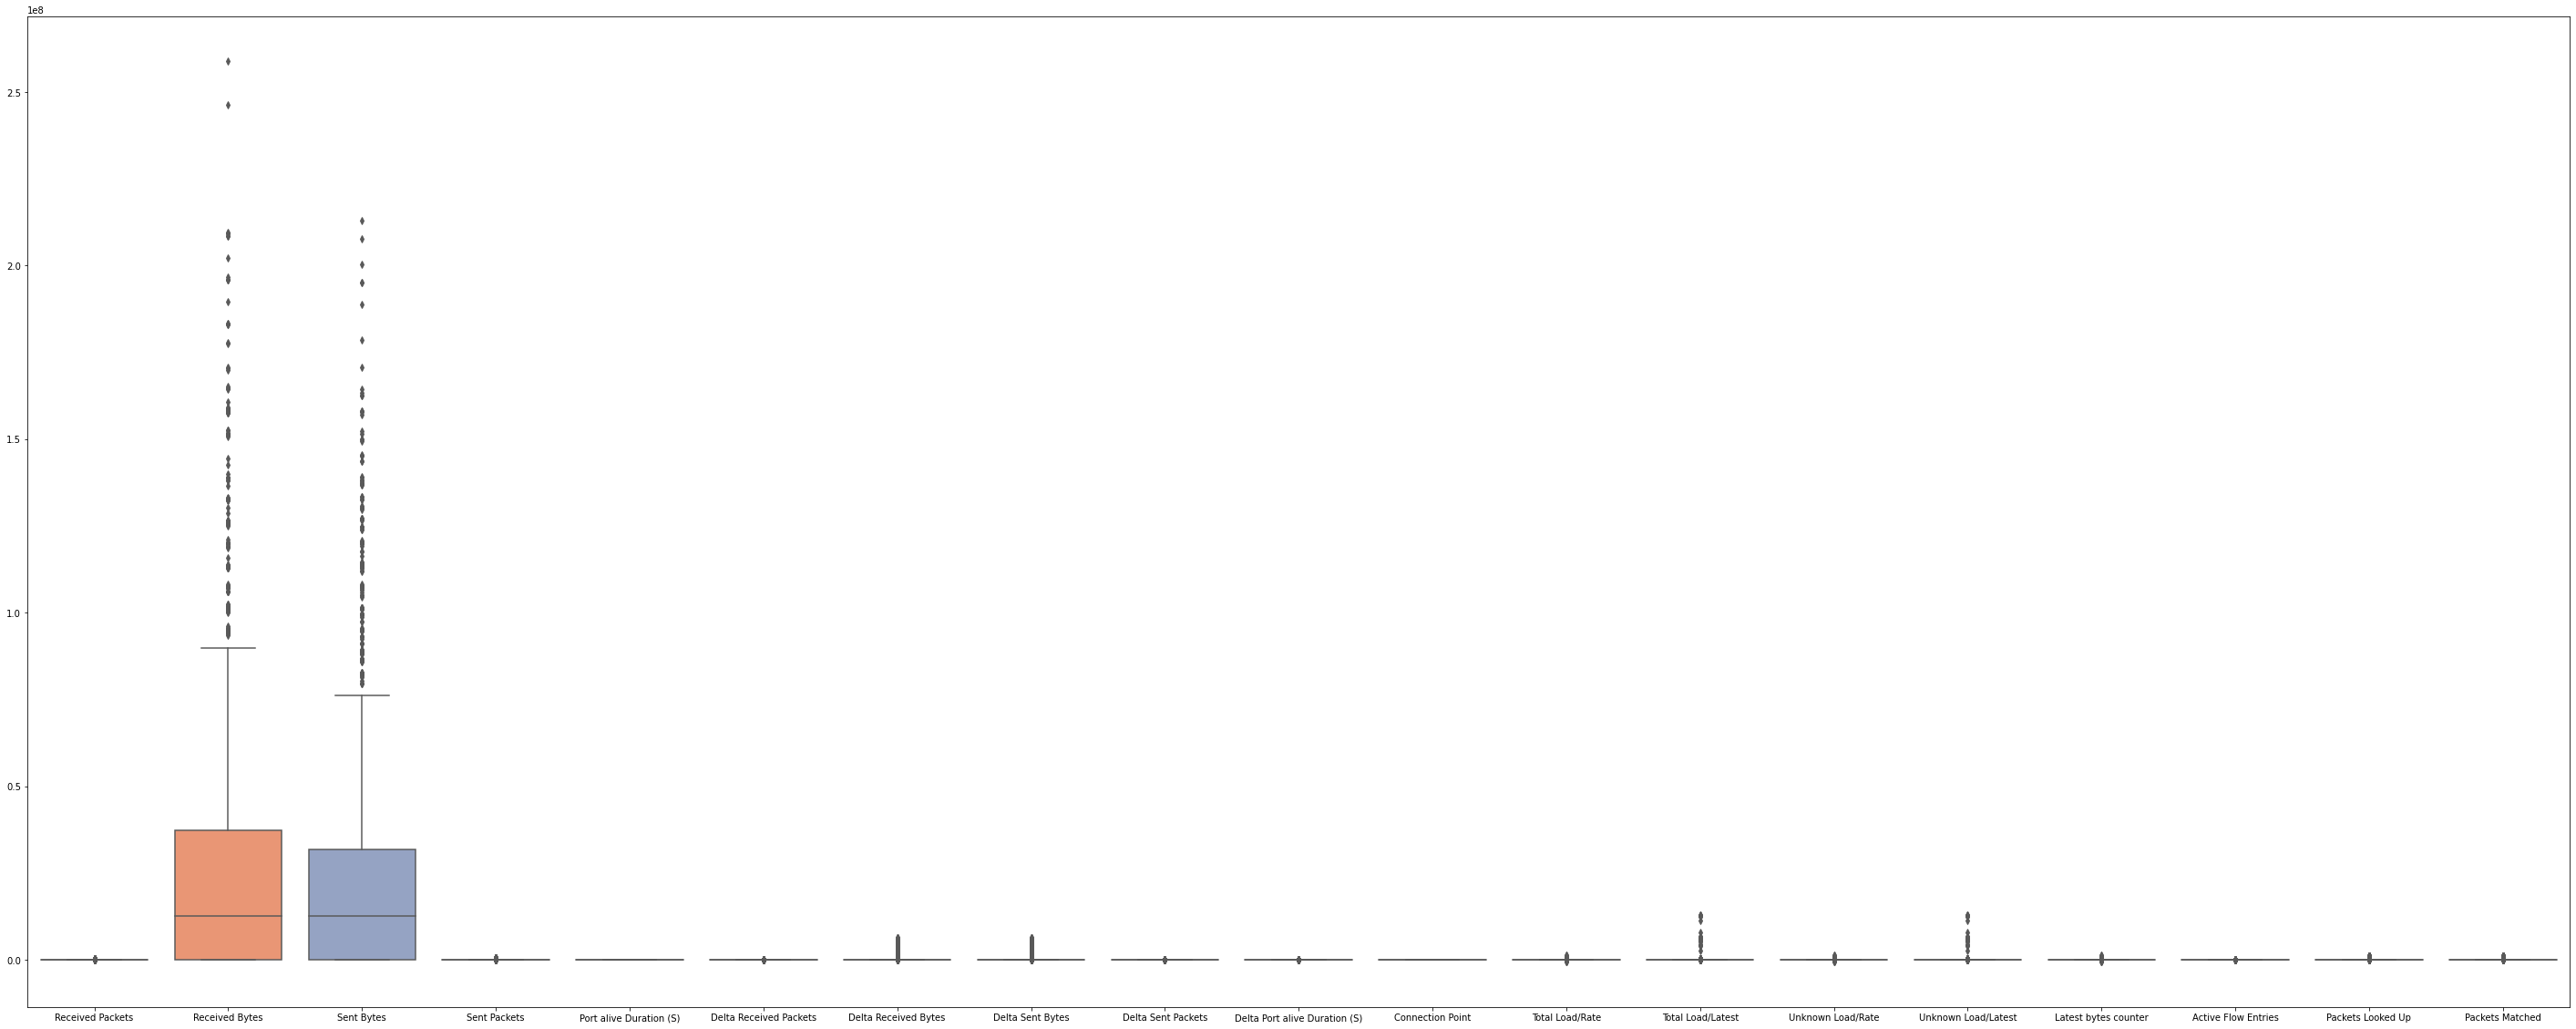

In [19]:
plt.figure(figsize=(50,20))
ax = sns.boxplot(data=train_data, palette="Set2")

In [20]:
Q1_test=test_data.quantile(0.25)
Q3_test=test_data.quantile(0.75)
IQR_test= Q3_test -Q1_test 
((test_data < Q1_test -1.5*IQR_test) | (test_data > Q3_test +1.5*IQR_test)).sum()

C:\Users\admin\AppData\Local\Temp/ipykernel_11576/440088309.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((test_data < Q1_test -1.5*IQR_test) | (test_data > Q3_test +1.5*IQR_test)).sum()


Active Flow Entries               31
Connection Point                   0
Delta Port alive Duration (S)     89
Delta Received Bytes             124
Delta Received Packets           130
Delta Sent Bytes                 127
Delta Sent Packets               127
Label                              0
Latest bytes counter              76
Packets Looked Up                108
Packets Matched                  108
Port Number                        0
Port alive Duration (S)            0
Received Bytes                    38
Received Packets                  69
Sent Bytes                        54
Sent Packets                      78
Switch ID                          0
Total Load/Latest                 99
Total Load/Rate                   76
Unknown Load/Latest               99
Unknown Load/Rate                 76
dtype: int64

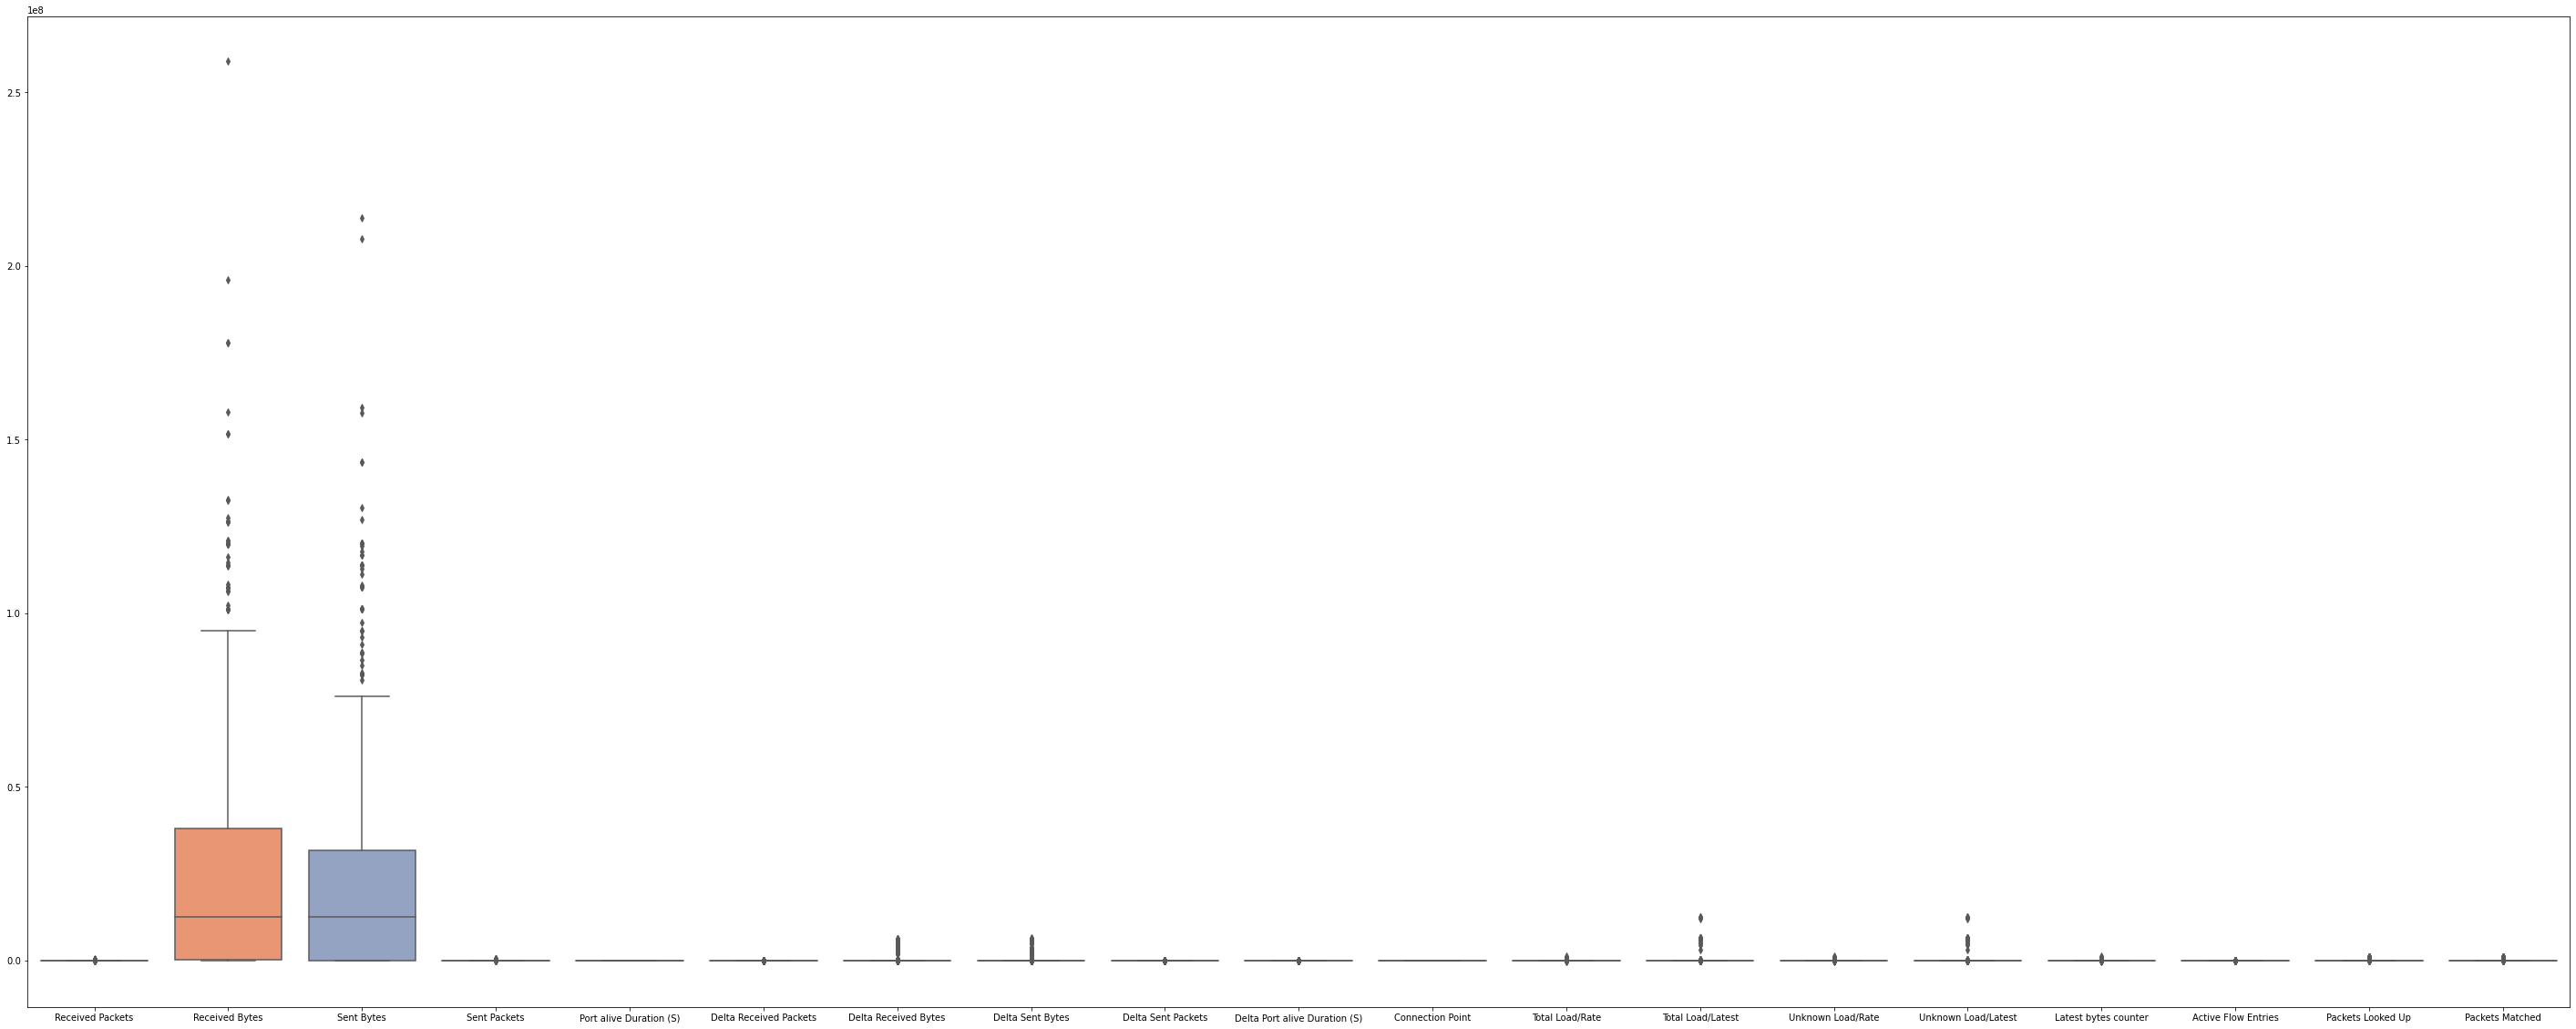

In [21]:
plt.figure(figsize=(50,20))
ax = sns.boxplot(data=test_data, palette="Set2")

In [22]:
Q1_val=test_data.quantile(0.25)
Q3_val=test_data.quantile(0.75)
IQR_val= Q3_val -Q1_val 
((val_data < Q1_val -1.5*IQR_val) | (val_data > Q3_val +1.5*IQR_val)).sum()

C:\Users\admin\AppData\Local\Temp/ipykernel_11576/2383874531.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((val_data < Q1_val -1.5*IQR_val) | (val_data > Q3_val +1.5*IQR_val)).sum()


Active Flow Entries               30
Connection Point                   0
Delta Port alive Duration (S)     86
Delta Received Bytes             105
Delta Received Packets           112
Delta Sent Bytes                 119
Delta Sent Packets               120
Label                              0
Latest bytes counter              60
Packets Looked Up                118
Packets Matched                  119
Port Number                        0
Port alive Duration (S)            0
Received Bytes                    32
Received Packets                  74
Sent Bytes                        54
Sent Packets                      75
Switch ID                          0
Total Load/Latest                 90
Total Load/Rate                   60
Unknown Load/Latest               90
Unknown Load/Rate                 60
dtype: int64

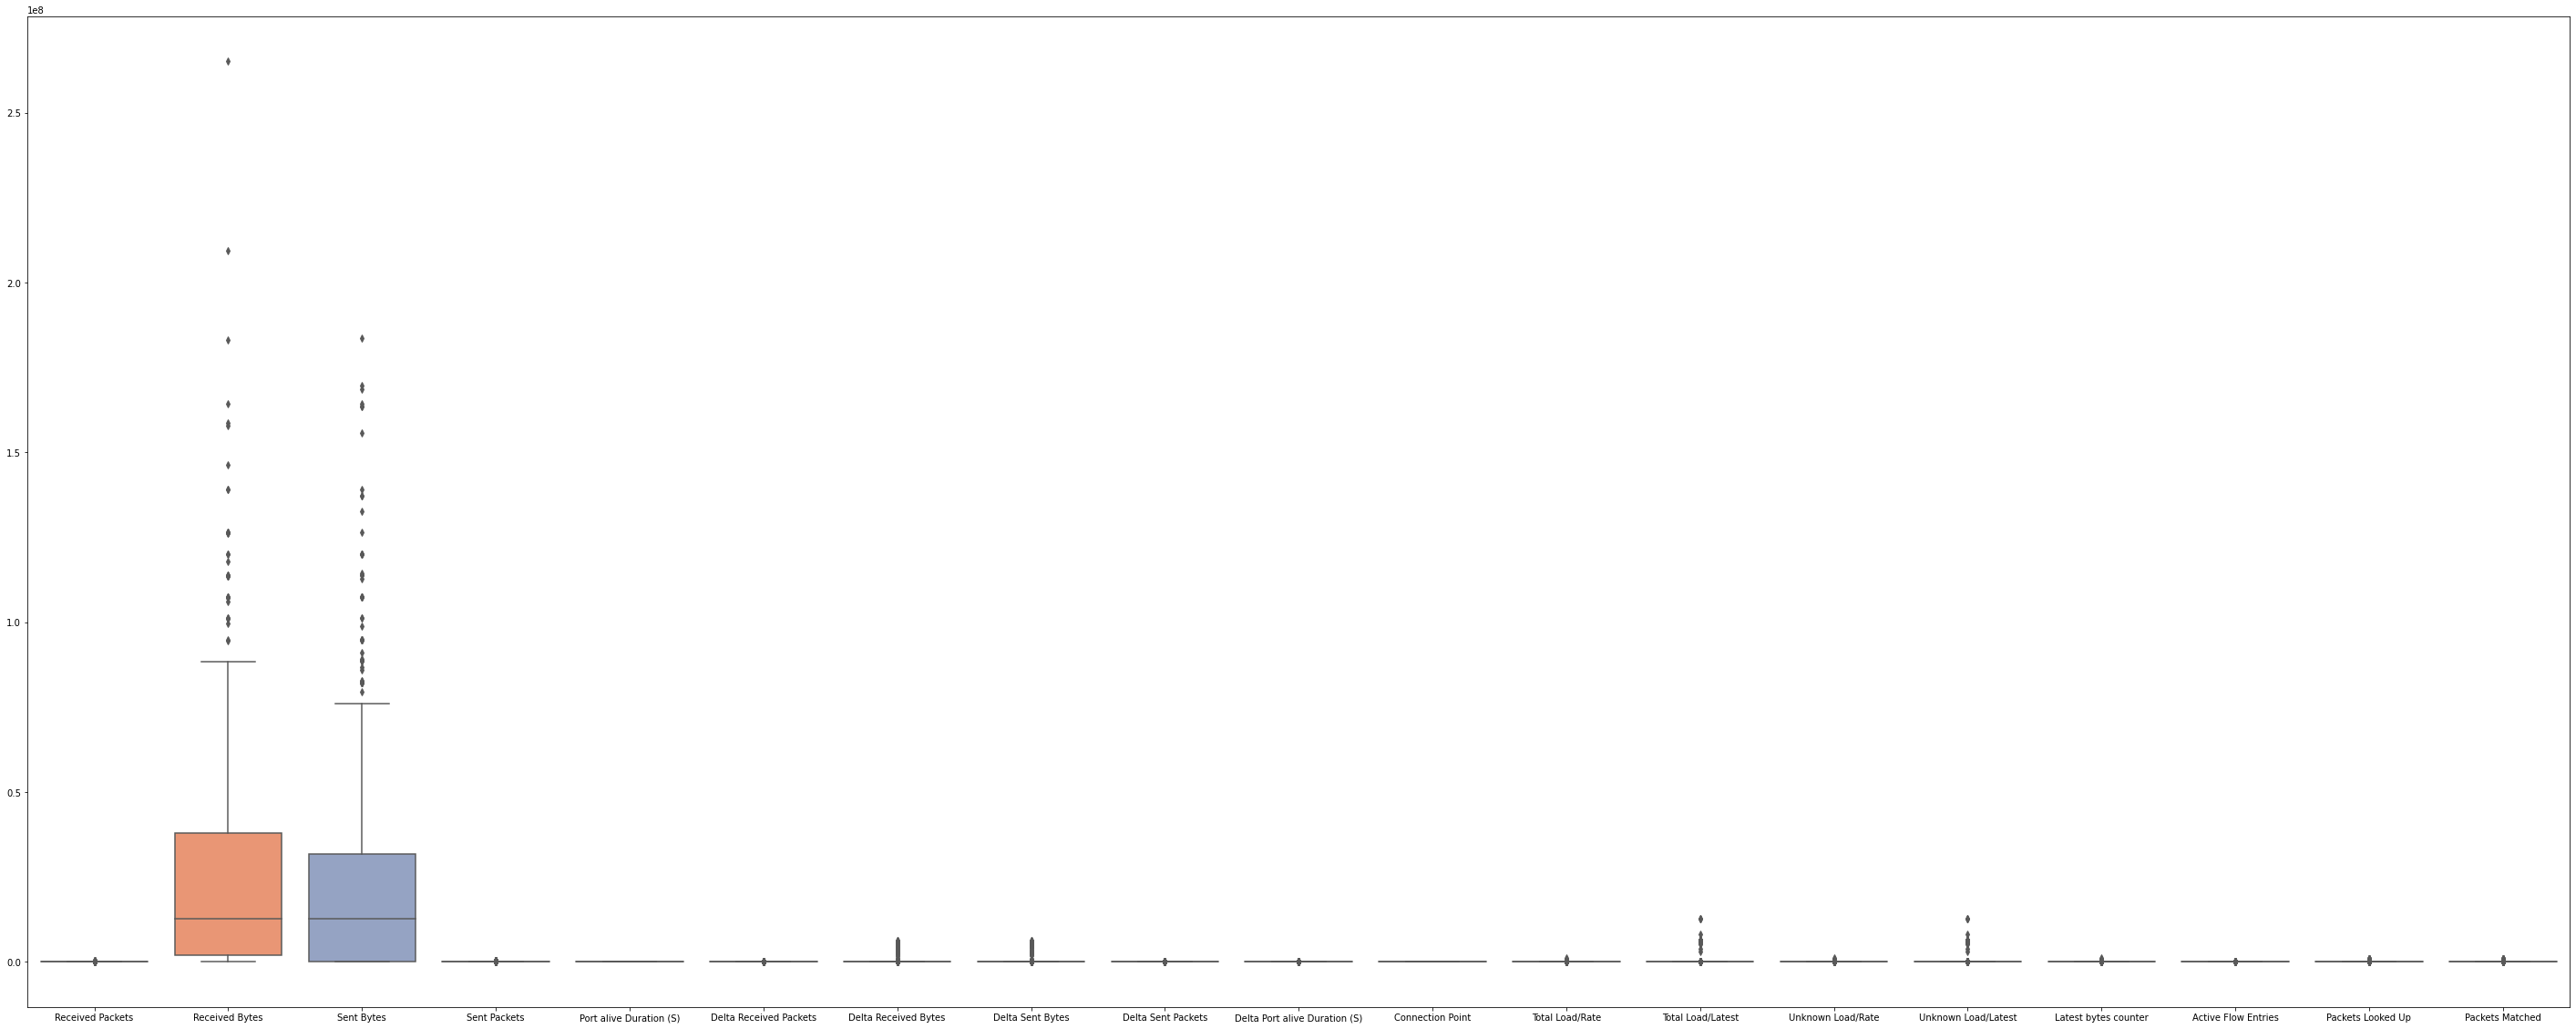

In [23]:
plt.figure(figsize=(50,20))
ax = sns.boxplot(data=val_data, palette="Set2")

# ○ Basic statistical analysis for every feature (mean, std, min, max)

In [24]:
test_data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.00000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,5.610000e+02,5.610000e+02
mean,23141.636364,2.726677e+07,2.438093e+07,30155.998217,910.654189,149.048128,4.546660e+05,3.171120e+05,169.782531,4.841355,2.44385,1.992058e+04,6.084924e+05,1.992058e+04,6.084924e+05,1.992058e+04,61.912656,9.053312e+04,9.041352e+04
std,69278.589077,3.627827e+07,3.439084e+07,82370.302150,981.303212,861.268543,1.381151e+06,1.207563e+06,1030.484551,0.365671,1.20006,1.105112e+05,1.985467e+06,1.105112e+05,1.985467e+06,1.105112e+05,601.548185,2.235338e+05,2.235324e+05
min,10.000000,8.560000e+02,6.854000e+03,49.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.00000,-4.042080e+05,0.000000e+00,-4.042080e+05,0.000000e+00,-4.042080e+05,4.000000,1.790000e+02,9.800000e+01
25%,353.000000,1.042010e+05,4.480100e+04,322.000000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.346000e+03,2.238000e+03
50%,1376.000000,1.267023e+07,1.262299e+07,1215.000000,256.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,7.066000e+03,6.929000e+03
75%,3562.000000,3.809469e+07,3.176783e+07,4054.000000,1742.000000,19.000000,1.823000e+03,7.590000e+02,5.000000,5.000000,3.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,1.963300e+04,1.940900e+04
max,352572.000000,2.589394e+08,2.138743e+08,420932.000000,3307.000000,11130.000000,6.323770e+06,6.647966e+06,13840.000000,5.000000,5.00000,1.194922e+06,1.264637e+07,1.194922e+06,1.264637e+07,1.194922e+06,9980.000000,1.009529e+06,1.009394e+06


In [25]:
train_data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2.619000e+03,2619.000000,2.619000e+03,2.619000e+03
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,2.450935,2.044276e+04,5.033087e+05,2.044276e+04,5.033087e+05,2.044276e+04,94.972890,9.920463e+04,9.908445e+04
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,1.159286,1.141013e+05,1.796231e+06,1.141013e+05,1.796231e+06,1.141013e+05,828.181086,2.363175e+05,2.363162e+05
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,-6.446240e+05,0.000000e+00,-6.446240e+05,0.000000e+00,-6.446240e+05,4.000000,1.050000e+02,5.000000e+01
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.263000e+03,2.147000e+03
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,6.968000e+03,6.843000e+03
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.163300e+04,2.140800e+04
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,5.000000,1.260657e+06,1.275386e+07,1.260657e+06,1.275386e+07,1.260657e+06,9985.000000,1.012220e+06,1.012085e+06


In [26]:
val_data.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
count,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,561.000000,561.000000,561.000000,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,5.610000e+02,561.000000,5.610000e+02,5.610000e+02
mean,20265.901961,2.651052e+07,2.462073e+07,26309.124777,949.360071,238.839572,3.268137e+05,2.927781e+05,162.711230,4.846702,2.422460,1.349392e+04,4.418708e+05,1.349392e+04,4.418708e+05,1.349392e+04,62.071301,8.382923e+04,8.370799e+04
std,59032.911054,3.505715e+07,3.420225e+07,75202.041514,977.609275,1149.069110,1.181636e+06,1.106077e+06,909.905479,0.360596,1.150215,9.124726e+04,1.725488e+06,9.124726e+04,1.725488e+06,9.124726e+04,601.962008,2.056357e+05,2.056371e+05
min,10.000000,8.560000e+02,7.202000e+03,50.000000,36.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,1.400000e+02,8.400000e+01
25%,379.000000,1.962210e+06,4.856800e+04,377.000000,141.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000,2.462000e+03,2.350000e+03
50%,1385.000000,1.266395e+07,1.263028e+07,1239.000000,317.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,8.105000e+03,7.979000e+03
75%,3642.000000,3.785762e+07,3.176313e+07,3889.000000,1750.000000,5.000000,6.260000e+02,7.590000e+02,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000,2.073500e+04,2.060700e+04
max,350280.000000,2.652568e+08,1.837435e+08,419567.000000,3287.000000,11273.000000,6.249706e+06,6.302708e+06,11273.000000,5.000000,5.000000,1.260664e+06,1.273210e+07,1.260664e+06,1.273210e+07,1.260664e+06,9979.000000,1.009010e+06,1.008875e+06


# Q1) Obtain a baseline performance 

In [27]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]
X_val=val_data.iloc[:,:-1]
y_val=val_data.iloc[:,-1]
X_tes=test_data.iloc[:,:-1]
y_tes=test_data.iloc[:,-1]

In [28]:
#Label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_tes= pd.DataFrame(le.fit_transform(y_tes))
y_train= pd.DataFrame(le.fit_transform(y_train))
y_val= pd.DataFrame(le.fit_transform(y_val))
X_train['Port Number']=le.fit_transform(X_train['Port Number'])
X_val['Port Number']=le.fit_transform(X_val['Port Number'])
X_tes['Port Number']=le.fit_transform(X_tes['Port Number'])
X_train['Switch ID']=le.fit_transform(X_train['Switch ID'])
X_val['Switch ID']=le.fit_transform(X_val['Switch ID'])
X_tes['Switch ID']=le.fit_transform(X_tes['Switch ID'])
y_trainle= pd.DataFrame(y_train)


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#Train
XX_train=sc.fit_transform(X_train)
#Test
XX_val=sc.fit_transform(X_val)
#Val
XX_tes=sc.fit_transform(X_tes)

In [30]:
mlp = keras.models.Sequential()
mlp.add(Dense(10, activation='relu' , input_shape=(21,)))
# add the output layer with 10 units and Softmax activation function

mlp.add(Dense(6, activation='softmax',))
mlp.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer=tfaAdamw.optimizers.AdamW(learning_rate= 0.001, weight_decay= 0.001), metrics=['accuracy'])

In [31]:
h = mlp.fit(XX_train, y_train,validation_data= (XX_tes,y_tes), epochs=500, batch_size=1, verbose=0)


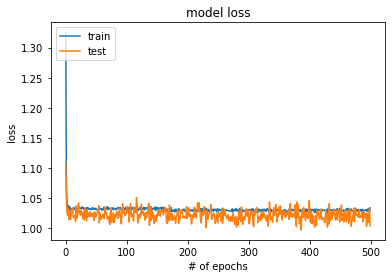

In [32]:
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
h_train=100*mlp.evaluate(XX_val,y_val, verbose=0)[1]

In [36]:
print('Test accuracy: %.2f %%'%(100*mlp.evaluate(XX_val,y_val, verbose=0)[1]))

Test accuracy: 60.96 %


# function to calculate accuracy (min-max)


In [41]:
def min_max(acc_tes,acc_tra):
  #accuracy test
  min_tes =np.min(acc_tes)
  max_tes =np.max(acc_tes)
  ave_tes =sum(np.reshape(acc_tes,(1,-1))[0]) / len(np.reshape(acc_tes,(1,-1))[0])
  #accuracy train
  min_tra =np.min(acc_tra)
  max_tra =np.max(acc_tra)
  ave_tra =sum(np.reshape(acc_tra,(1,-1))[0]) / len(np.reshape(acc_tra,(1,-1))[0])
  print("minimum test accuracy is", min_tes)
  print("maximum test accuracy is:", max_tes)
  print("average test accuracy is:", ave_tes)
  print("minimum training accuracy is:", min_tra)
  print("maximum training accuracy is:", max_tra)
  print("average training accuracy is:", ave_tra)

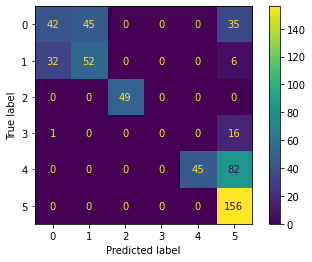

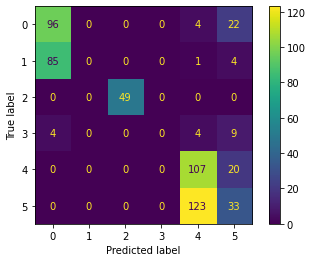

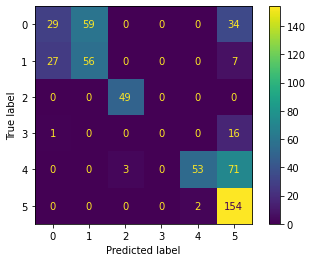

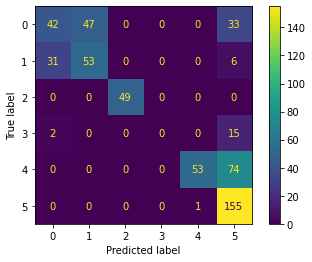

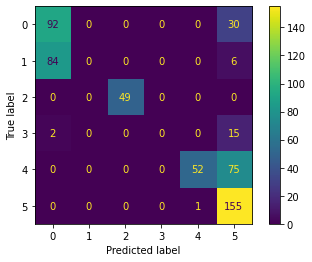

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

test_accuracy=[]
train_accuracy=[]
val_accuracy=[]
conmatrix=[]
opt=tfaAdamw.optimizers.AdamW(learning_rate= 0.001, weight_decay= 0.001)
for i in range(5):
  #bulid model
  model = keras.models.Sequential()
  model.add(Dense(10, activation='relu' , input_shape=(21,)))
# add the output layer with 10 units and Softmax activation function
  model.add(Dense(6, activation='softmax',))

  model.compile(loss = keras.losses.SparseCategoricalCrossentropy(), optimizer=opt, metrics=['accuracy']) 
  history = model.fit(XX_train, y_train,validation_data= (XX_tes,y_tes), epochs=500, batch_size=1, verbose=0)
  val_accuracy.append(100*mlp.evaluate(XX_val,y_val, verbose=0)[1])
  test_accuracy.append(model.history.history['val_accuracy'])
  train_accuracy.append(model.history.history['accuracy'])
#bulid confusion matrix
  label_pred=model.predict(XX_tes) 
  final_label = np.argmax(label_pred, axis=1)
  final_label = final_label.reshape((-1,1))
  cnf_matrix=confusion_matrix(y_tes,final_label)
  conmatrix.append(cnf_matrix)
  print(ConfusionMatrixDisplay(cnf_matrix).plot())

  

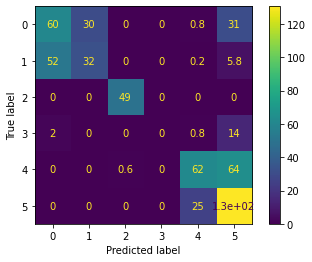

In [39]:
cm_concat = pd.concat((pd.DataFrame(conmatrix[0]),pd.DataFrame(conmatrix[1]),pd.DataFrame(conmatrix[2]),pd.DataFrame(conmatrix[3]),pd.DataFrame(conmatrix[4])))
cm_group = cm_concat.groupby(cm_concat.index)
c=cm_group.mean()
ConfusionMatrixDisplay(np.array(c)).plot()

In [42]:

min_max(test_accuracy,train_accuracy)

minimum test accuracy is 0.488413542509079
maximum test accuracy is: 0.6737967729568481
average test accuracy is: 0.6028784319639205
minimum training accuracy is: 0.5047728419303894
maximum training accuracy is: 0.6212294697761536
average training accuracy is: 0.5959022533655166


# TSNE 2D

In [55]:
from sklearn.manifold import TSNE
def TSNEPlot(n,data,label,title1):
  tsne = TSNE(n_components=n, random_state=0)
  X_2d = tsne.fit_transform(data)
  dftsne = pd.DataFrame(X_2d)
  dftsne['label'] = label 
  dftsne.columns = ['TSNE COMP1','TSNE COMP2','label']
  dftsne
  plt.figure(figsize=(6, 5))
  
  sns.scatterplot(data=dftsne,x='TSNE COMP1',y='TSNE COMP2',hue='label',legend="full",alpha=1).set(title=title1)



In [53]:
y_train

,0
0,5
1,5
2,2
3,4
4,3
...,...
2614,4
2615,0
2616,5
2617,0


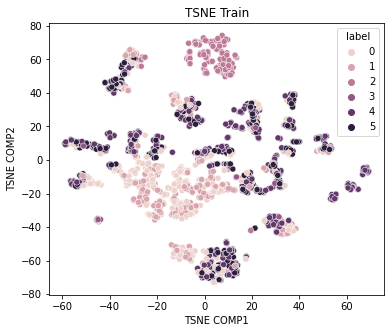

In [56]:
#2D TSNE plot for the train set
TSNEPlot(2,XX_train,y_train,'TSNE Train')

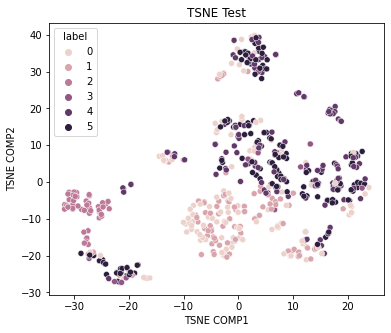

In [58]:
#2D TSNE plot for the test set
TSNEPlot(2,XX_tes,y_tes,'TSNE Test')

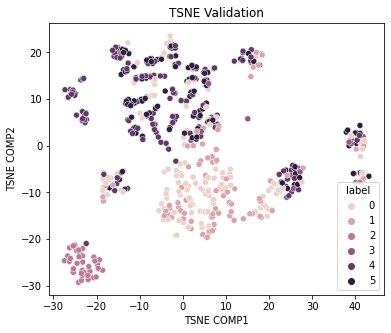

In [59]:
#2D TSNE plot for the validation set
TSNEPlot(2,XX_val,y_val,'TSNE Validation')

# Compare dimensionality reduction to feature selection

In [60]:
y_train = keras.utils.to_categorical(y_trainle)
y_val = keras.utils.to_categorical(y_val)


In [61]:
y_test=keras.utils.to_categorical(y_tes)

### Dimensionality reduction using PCA

In [62]:
def build_model(no_epoch,x_train,y_train,x_validation,y_validation,b_size=1):
  mlp = keras.models.Sequential()
  mlp.add(Dense(10, activation='relu' ))
  mlp.add(Dense(6, activation='softmax',))
  opt=tfaAdamw.optimizers.AdamW(learning_rate= 0.001, weight_decay= 0.001)
  earlystopping = callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=30,
                                                        verbose=1, mode='max', baseline=None, restore_best_weights=True)
  mlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  result = mlp.fit(x=x_train,y= y_train,validation_data= (x_validation,y_validation), epochs=no_epoch, batch_size= b_size, verbose=0,callbacks =[earlystopping])
  return mlp,result


In [63]:
def model_evaluate(model,x_test,y_test):
  val_loss,val_acc = model.evaluate(x_test,y_test)
  return val_loss,val_acc

In [64]:
def PCA_function(data1,n_components=2):
  pca = PCA(n_components=n_components)
  PCA_reduction = pca.fit_transform(data1)
  return PCA_reduction

In [65]:
def draw_tsne(n,data,label_data,title1):
  tsne = TSNE(n_components=n, random_state=0)
  X_2d = tsne.fit_transform(data)
  dftsne = pd.DataFrame(X_2d)
  dftsne['label'] = label_data 
  dftsne.columns = ['TSNE COMP1','TSNE COMP2','label']
  dftsne
  plt.figure(figsize=(6, 5))
  
  sns.scatterplot(data=dftsne,x='TSNE COMP1',y='TSNE COMP2',hue='label',legend="full",alpha=1).set(title=title1)


In [67]:
accuracy_dic={}
accuracy_list=[]
pca_validation=[]
for i in range(2,21):
  pca = PCA(n_components=i)
  Xtrain_pca = pca.fit_transform(XX_train)
  X_val_pca=pca.transform(XX_val)
  X_test_pca=pca.transform(XX_tes)

  pca_NN_model,pca_result = build_model(500,Xtrain_pca,y_train,X_val_pca,y_val)
  pca_val_loss,pca_val_acc = model_evaluate(pca_NN_model,X_test_pca,y_test)

  accuracy_list.append(pca_val_acc*100)
  pca_validation.append(pca_result.history['val_accuracy']*100)
best_n= accuracy_list.index(max(accuracy_list))+2
max_acc=max(accuracy_list)


Restoring model weights from the end of the best epoch: 38.
Epoch 68: early stopping
18/18 [==============================] - 0s 859us/step - loss: 1.3344 - accuracy: 0.4510
Restoring model weights from the end of the best epoch: 23.
Epoch 53: early stopping
18/18 [==============================] - 0s 782us/step - loss: 1.1340 - accuracy: 0.6150
Restoring model weights from the end of the best epoch: 8.
Epoch 38: early stopping
18/18 [==============================] - 0s 765us/step - loss: 1.1187 - accuracy: 0.6310
Restoring model weights from the end of the best epoch: 12.
Epoch 42: early stopping
18/18 [==============================] - 0s 844us/step - loss: 1.1090 - accuracy: 0.4599
Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
18/18 [==============================] - 0s 763us/step - loss: 1.1452 - accuracy: 0.6043
Restoring model weights from the end of the best epoch: 50.
Epoch 80: early stopping
18/18 [==============================] - 0s 923

In [68]:
print("Best value of n components for NN: ",best_n," with maximmum accuracy ",max_acc)

Best value of n components for NN:  4  with maximmum accuracy  63.10160160064697


### plot PCA tsne diagram

In [77]:
tsne_pca = PCA(n_components=4)
tsne_Xtrain_pca = pca.fit_transform(XX_train)
tsne_X_val_pca=pca.transform(XX_val)
tsne_X_test_pca=pca.transform(XX_tes)

In [ ]:
# tsne_pca_NN_model,tsne_pca_result = build_model(500,tsne_Xtrain_pca,y_train,tsne_X_val_pca,y_val)
# tsne_pca_val_loss,tsne_pca_val_acc = model_evaluate(tsne_pca_NN_model,tsne_X_test_pca,y_test)

In [70]:
testing_acc=[h_train]*19


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


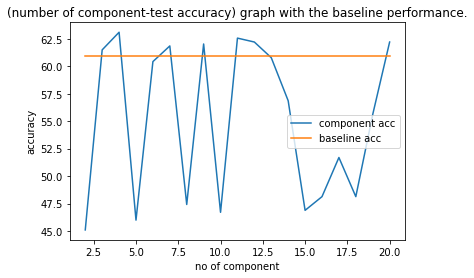

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
l=list(range(2,21))
sns.lineplot(l, accuracy_list)
sns.lineplot(l,testing_acc)
plt.xlabel('no of component')
plt.ylabel('accuracy')
plt.title('(number of component-test accuracy) graph with the baseline performance.')
plt.legend(['component acc', 'baseline acc'])

plt.show()


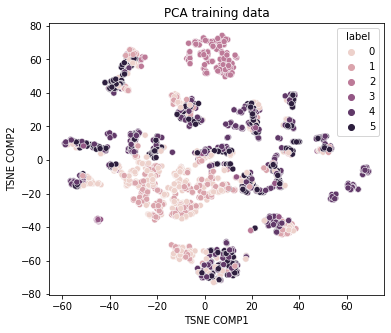

In [78]:
draw_tsne(2,tsne_Xtrain_pca,y_trainle,"PCA training data")

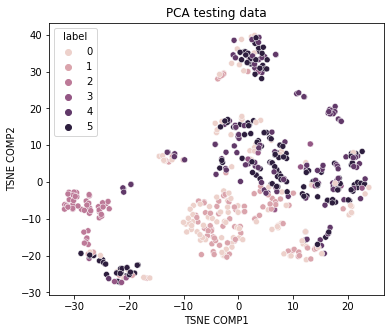

In [79]:
draw_tsne(2,tsne_X_test_pca,y_tes,"PCA testing data")

# Feature Selection

### Filter selection using ANOVA

In [80]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.feature_selection import SequentialFeatureSelector

In [81]:
def select_feature(epoch,X_train, y_train, X_test, y_test,x_validation,y_validation, FSM):
  fs = FSM
  fs.fit(X_train, y_trainle)
  X_train_new = fs.transform(X_train)
  X_val_new=fs.transform(x_validation)
  X_test_new = fs.transform(X_test)
  cols = fs.get_support(indices=True)
  sele_NN_model,sele_result = build_model(epoch,X_train_new,y_train,X_val_new,y_validation)
  sele_val_loss,sele_val_acc = model_evaluate(sele_NN_model,X_test_new,y_test)
  
  return sele_NN_model,sele_result,sele_val_loss,sele_val_acc,cols

In [119]:
accuracy_dic2={}
accuracy_list2=[]
validation_acc_Anova=[]
columns=[]
#Anova
for i in range(2,21):
  fsm =  SelectKBest(f_classif, k=i)
  sele_NN_model,sele_result,sele_val_loss,sele_val_acc,column = select_feature(500,XX_train, y_train,XX_tes,y_test, XX_val, y_val, fsm)
  accuracy_list2.append(sele_val_acc)
  validation_acc_Anova.append(sele_result.history['val_accuracy'])
  columns.append(column)
  




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 37.
Epoch 67: early stopping
18/18 [==============================] - 0s 797us/step - loss: 1.3882 - accuracy: 0.4795


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 60.
Epoch 90: early stopping
18/18 [==============================] - 0s 796us/step - loss: 1.3619 - accuracy: 0.4617


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
18/18 [==============================] - 0s 745us/step - loss: 1.0482 - accuracy: 0.6417


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
18/18 [==============================] - 0s 763us/step - loss: 1.0495 - accuracy: 0.6168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 13.
Epoch 43: early stopping
18/18 [==============================] - 0s 764us/step - loss: 1.0502 - accuracy: 0.6310


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0440 - accuracy: 0.6524


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
18/18 [==============================] - 0s 763us/step - loss: 1.0625 - accuracy: 0.6007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
18/18 [==============================] - 0s 776us/step - loss: 1.0421 - accuracy: 0.5098


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Epoch 40: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0172 - accuracy: 0.6275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
18/18 [==============================] - 0s 885us/step - loss: 1.0225 - accuracy: 0.6488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 10.
Epoch 40: early stopping
18/18 [==============================] - 0s 764us/step - loss: 1.0111 - accuracy: 0.6346


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 45.
Epoch 75: early stopping
18/18 [==============================] - 0s 938us/step - loss: 1.0254 - accuracy: 0.6488


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 23.
Epoch 53: early stopping
18/18 [==============================] - 0s 763us/step - loss: 1.0157 - accuracy: 0.6738


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 64.
Epoch 94: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0227 - accuracy: 0.6275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 40.
Epoch 70: early stopping
18/18 [==============================] - 0s 776us/step - loss: 1.0163 - accuracy: 0.6399


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 12.
Epoch 42: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0158 - accuracy: 0.6114


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 8.
Epoch 38: early stopping
18/18 [==============================] - 0s 809us/step - loss: 1.0286 - accuracy: 0.6239


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 29.
Epoch 59: early stopping
18/18 [==============================] - 0s 2ms/step - loss: 1.0241 - accuracy: 0.6114


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 14.
Epoch 44: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0485 - accuracy: 0.6292


In [120]:
print('max ANOVA',max(accuracy_list2))
best_n=accuracy_list2.index(max(accuracy_list2))+2
print("Best value of n components: ",best_n, "from ANOVA filter method")

max ANOVA 0.6737967729568481
Best value of n components:  14 from ANOVA filter method


In [125]:
columns[12]

array([ 1,  2,  3,  4,  5,  6,  7, 10, 12, 14, 16, 18, 19, 20],
      dtype=int64)

### Filter Selection using Mutual Information

In [121]:
accuracy_dic2={}
accuracy_list3=[]
columns2=[]
validation_acc_mutualonfo=[]
#mutual_info_classif
for i in range(2,21):
  fsm =  SelectKBest(mutual_info_classif, k=i)
  sele_NN_model,sele_result,sele_val_loss,sele_val_acc,col2 = select_feature(500,XX_train, y_train,XX_tes,y_test, XX_val, y_val, fsm)
  accuracy_list3.append(sele_val_acc)
  validation_acc_mutualonfo.append(sele_result.history['val_accuracy'])
  columns2.append(col2)


 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
18/18 [==============================] - 0s 791us/step - loss: 1.1413 - accuracy: 0.4795


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 30.
Epoch 60: early stopping
18/18 [==============================] - 0s 763us/step - loss: 1.0989 - accuracy: 0.6328


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 50.
Epoch 80: early stopping
18/18 [==============================] - 0s 774us/step - loss: 1.0640 - accuracy: 0.5758


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 31.
Epoch 61: early stopping
18/18 [==============================] - 0s 869us/step - loss: 1.0968 - accuracy: 0.4581


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
18/18 [==============================] - 0s 946us/step - loss: 1.0738 - accuracy: 0.4706


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
18/18 [==============================] - 0s 824us/step - loss: 1.0520 - accuracy: 0.6275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 16.
Epoch 46: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0345 - accuracy: 0.6203


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 16.
Epoch 46: early stopping
18/18 [==============================] - 0s 2ms/step - loss: 1.0379 - accuracy: 0.6275


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 7.
Epoch 37: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0550 - accuracy: 0.6381


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 11.
Epoch 41: early stopping
18/18 [==============================] - 0s 2ms/step - loss: 1.0311 - accuracy: 0.6168


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 14.
Epoch 44: early stopping
18/18 [==============================] - 0s 836us/step - loss: 1.0206 - accuracy: 0.6007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 32.
Epoch 62: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0424 - accuracy: 0.6292


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 31.
Epoch 61: early stopping
18/18 [==============================] - 0s 808us/step - loss: 1.0370 - accuracy: 0.6310


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 28.
Epoch 58: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0327 - accuracy: 0.5062


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 8.
Epoch 38: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0446 - accuracy: 0.5383


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
18/18 [==============================] - 0s 759us/step - loss: 1.0339 - accuracy: 0.6203


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 40.
Epoch 70: early stopping
18/18 [==============================] - 0s 759us/step - loss: 1.0345 - accuracy: 0.5954


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 21.
Epoch 51: early stopping
18/18 [==============================] - 0s 2ms/step - loss: 1.0200 - accuracy: 0.6381


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Restoring model weights from the end of the best epoch: 31.
Epoch 61: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0157 - accuracy: 0.6595


In [122]:
print('max mutal',max(accuracy_list3))
best_sele_n=accuracy_list3.index(max(accuracy_list3))+2
print("Best value of n components: ",best_sele_n, "from Mutual information for a discrete target filter method")

max mutal 0.6595365405082703
Best value of n components:  20 from Mutual information for a discrete target filter method


### build model with Mutual information

### updated data

In [126]:
# X training data after filter selection
XX_train_df = pd.DataFrame(XX_train)
XX_train_df.iloc[:,columns[12]]

,1,2,3,4,5,6,7,10,12,14,16,18,19,20
0,-1.179390,-0.318563,-0.709785,-0.335537,-0.366763,-0.787591,-0.170066,-0.163127,-1.251816,-0.280256,-0.280256,-0.109868,-0.416408,-0.416164
1,-0.181386,-0.319889,-0.709677,-0.715896,-0.367768,-0.741234,-0.166178,-0.120959,-0.389051,-0.280256,-0.280256,-0.108660,-0.415565,-0.415482
2,0.816618,-0.291219,0.321926,1.333552,4.203925,0.418716,-0.170066,-0.161070,-0.389051,-0.280256,-0.280256,-0.105037,3.759201,3.759206
3,1.814622,-0.307835,-0.194000,-0.176054,0.711352,-0.736083,-0.167150,4.979328,0.473713,-0.280256,-0.280256,-0.105037,0.409165,0.409257
4,-1.179390,-0.315602,-0.709446,-0.138653,-0.354670,0.577359,-0.170066,-0.161070,-1.251816,-0.280256,-0.280256,-0.109868,-0.400727,-0.400698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,-1.179390,-0.311994,-0.194503,-0.716178,-0.369126,-0.761837,-0.168122,-0.163127,1.336478,-0.280256,-0.280256,-0.107452,-0.413259,-0.413150
2615,-0.181386,-0.271496,-0.015737,0.243498,-0.336524,1.478742,-0.166178,-0.161070,0.473713,-0.280256,-0.280256,-0.109868,-0.357344,-0.357375
2616,0.816618,-0.316200,-0.537908,-0.716567,-0.370849,-0.813345,-0.143820,-0.161070,-0.389051,-0.280256,-0.280256,-0.105037,-0.408497,-0.408406
2617,-0.181386,-0.309389,-0.365867,0.046601,-0.358248,-0.540355,-0.124378,-0.057192,-0.389051,3.229734,3.229734,-0.107452,-0.406804,-0.406772


In [127]:
# X validation data after filter selection
XX_validation_df = pd.DataFrame(XX_val)
XX_validation_df.iloc[:,columns[12]]

,1,2,3,4,5,6,7,10,12,14,16,18,19,20
0,-1.171515,-0.299624,1.403570,0.208859,-0.306131,0.739851,-0.208040,-0.174582,-0.367616,-0.256313,-0.256313,-0.093231,-0.348296,-0.348745
1,-1.171515,-0.343435,-0.756859,-0.720215,-0.349173,-0.909518,-0.208040,-0.175682,-0.367616,-0.256313,-0.256313,-0.089905,-0.404236,-0.404037
2,0.758646,-0.306440,-0.391274,0.207031,-0.318056,0.631326,-0.158391,-0.144882,-0.367616,-0.256313,-0.256313,-0.093231,-0.377685,-0.377467
3,-1.171515,-0.336806,-0.576240,-0.719785,-0.346964,-0.837851,-0.134001,-0.173482,1.372742,-0.256313,-0.256313,-0.093231,-0.402046,-0.401910
4,-1.171515,-0.279193,1.585686,1.871571,-0.276610,1.635690,-0.208040,-0.174582,-1.237794,-0.256313,-0.256313,-0.096556,-0.354594,-0.354396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.758646,-0.341350,-0.756619,-0.535611,-0.346352,-0.863446,-0.208040,-0.174582,-1.237794,-0.256313,-0.256313,-0.089905,-0.399661,-0.399491
557,1.723727,-0.322988,0.143617,0.342047,5.149011,0.089727,-0.138357,-0.007382,-0.367616,-0.256313,-0.256313,-0.093231,4.379647,4.379614
558,-0.206434,-0.314171,-0.213287,-0.532955,-0.336782,0.124537,-0.205427,-0.176782,2.242920,-0.256313,-0.256313,-0.096556,-0.374195,-0.374435
559,-0.206434,2.843122,0.732008,0.907614,1.269088,1.649000,-0.206298,-0.176782,-0.367616,-0.256313,-0.256313,-0.094893,2.118359,2.118506


In [128]:
# X testing data data after filter selection
XX_testing_df = pd.DataFrame(XX_tes)
XX_testing_df.iloc[:,columns[12]]

,1,2,3,4,5,6,7,10,12,14,16,18,19,20
0,-0.187852,-0.332645,-0.751838,-0.709117,-0.365056,-0.800318,-0.170887,-0.161993,0.463848,-0.306747,-0.306747,-0.093031,-0.394848,-0.394695
1,1.694021,4.711028,-0.345512,0.400432,1.531006,0.529713,-0.168562,-0.161022,1.297883,-0.306747,-0.306747,-0.096359,2.502783,2.502780
2,-0.187852,-0.332501,-0.752027,-0.525740,-0.363137,-0.830917,-0.173211,-0.162964,-0.370187,-0.306747,-0.306747,-0.093031,-0.387760,-0.387607
3,0.753084,-0.314167,-0.055877,0.214501,-0.331762,1.286525,0.033645,-0.061951,-1.204222,-0.306747,-0.306747,-0.089703,-0.359533,-0.359555
4,-1.128788,-0.334162,-0.752243,-0.709175,-0.365202,-0.825817,-0.173211,-0.161022,-0.370187,-0.306747,-0.306747,-0.086375,-0.377300,-0.377161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,-1.128788,-0.300904,0.121739,-0.521673,-0.348835,0.530733,-0.170887,-0.162964,2.131918,-0.306747,-0.306747,-0.089703,-0.363406,-0.363813
557,-0.187852,-0.248764,2.038878,-0.152669,-0.337534,1.229408,-0.168562,-0.161022,-0.370187,-0.306747,-0.306747,-0.089703,-0.328387,-0.328471
558,-1.128788,-0.327516,-0.403996,-0.708859,-0.363574,-0.790118,-0.170887,-0.162964,-0.370187,-0.306747,-0.306747,-0.094695,-0.397731,-0.397691
559,0.753084,-0.330680,-0.751547,-0.709019,-0.364643,-0.769719,-0.166238,-0.159079,-0.370187,-0.306747,-0.306747,-0.093031,-0.379490,-0.379458


### Draw training and testing tsne diagram for Anova Information

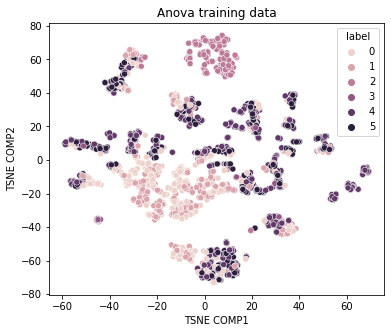

In [129]:
draw_tsne(2,XX_train_df,y_trainle,"Anova training data")

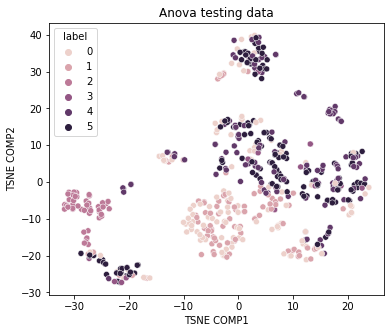

In [130]:
draw_tsne(2,XX_testing_df,y_tes,"Anova testing data")

# provide the confusion matrix. 

In [131]:
#print(np.max(np.array(validation_acc_mutualonfo)))
np.max(list(np.concatenate(validation_acc_mutualonfo).flat))

0.6577540040016174

In [133]:
np.max(list(np.concatenate(validation_acc_Anova).flat))
# print(np.max(list(np.concatenate(pca_validation).flat)))

0.6666666865348816

In [135]:
np.max(list(np.concatenate(pca_validation).flat))

0.6541889309883118

In [136]:
sele_NN_model,sele_result = build_model(500,XX_train_df,y_train,XX_validation_df,y_val)
sele_val_loss,sele_val_acc = model_evaluate(sele_NN_model,XX_testing_df,y_test)

Restoring model weights from the end of the best epoch: 12.
Epoch 42: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.0301 - accuracy: 0.6417


In [138]:
y_predict=sele_NN_model.predict(XX_testing_df)

In [139]:
y_predict

array([[0.12980996, 0.08434384, 0.01221643, 0.07338057, 0.33173713,
        0.36851206],
       [0.04371693, 0.03697202, 0.75699896, 0.01572621, 0.1194893 ,
        0.02709659],
       [0.12795009, 0.08276433, 0.01274042, 0.07339194, 0.33541304,
        0.36774024],
       ...,
       [0.13100699, 0.0848894 , 0.01191505, 0.07363275, 0.32859704,
        0.3699587 ],
       [0.12403351, 0.07841299, 0.0107618 , 0.06925084, 0.34140345,
        0.37613738],
       [0.14718653, 0.10100931, 0.01697589, 0.08168316, 0.31126615,
        0.34187892]], dtype=float32)

In [140]:
predict=[]
for pre in y_predict:
  predict.append(list(pre).index(max(pre)))

In [143]:
cm = confusion_matrix(y_tes, predict)

In [144]:
cm

array([[ 36,  55,   0,   0,   0,  31],
       [ 26,  59,   0,   0,   0,   5],
       [  0,   0,  49,   0,   0,   0],
       [  3,   0,   0,   0,   1,  13],
       [  0,   0,   3,   0,  61,  63],
       [  0,   0,   0,   0,   1, 155]], dtype=int64)

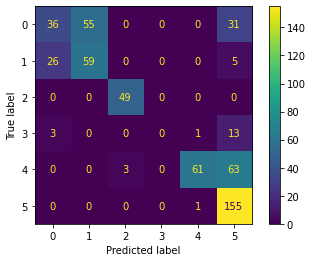

In [145]:
print(ConfusionMatrixDisplay(cm).plot())

# stat function

In [146]:
from statistics import mean
def min_max2(acc_tes,acc_tra,val):
  #accuracy test
  min_tes =np.min(acc_tes)
  max_tes =np.max(acc_tes)
  ave_tes =np.mean(acc_tes)
  #accuracy train
  min_tra =np.min(acc_tra)
  max_tra =np.max(acc_tra)
  ave_tra =np.mean(acc_tra)
  #validation acc
  min_val =np.min(val)
  max_val =np.max(val)
  ave_val =np.mean(val)

  print("minimum test accuracy is", min_tes)
  print("maximum test accuracy is:", max_tes)
  print("average test accuracy is:", ave_tes)
  print("minimum training accuracy is:", min_tra)
  print("maximum training accuracy is:", max_tra)
  print("average training accuracy is:", ave_tra)
  print("minimum validation accuracy is:", min_val)
  print("maximum validation accuracy is:", max_val)
  print("average validation accuracy is:", ave_val)

# Q3

## Batch size= 32

In [159]:
test_acc_b32=[]
train_acc_b32=[]
val_acc_b32=[]
for i in range(5):
  NN_model,result = build_model(500,XX_train_df,y_train,XX_validation_df,y_val,32)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_b32.append(test_acc)
  train_acc_b32.append(result.history['accuracy'])
  val_acc_b32.append(result.history['val_accuracy'])



Restoring model weights from the end of the best epoch: 76.
Epoch 106: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.7491 - accuracy: 0.7094
Restoring model weights from the end of the best epoch: 72.
Epoch 102: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7551 - accuracy: 0.6988
Restoring model weights from the end of the best epoch: 56.
Epoch 86: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7493 - accuracy: 0.7291
Restoring model weights from the end of the best epoch: 58.
Epoch 88: early stopping
18/18 [==============================] - 0s 527us/step - loss: 0.7616 - accuracy: 0.7041
Restoring model weights from the end of the best epoch: 97.
Epoch 127: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7544 - accuracy: 0.7130


In [160]:
print("-----------Stat info of batch 32-----------")
min_max2(test_acc_b32,train_acc_b32[-1],val_acc_b32[-1])

-----------Stat info of batch 32-----------
minimum test accuracy is 0.698752224445343
maximum test accuracy is: 0.7290552854537964
average test accuracy is: 0.7108734488487244
minimum training accuracy is: 0.23176784813404083
maximum training accuracy is: 0.7121038436889648
average training accuracy is: 0.6876249603164477
minimum validation accuracy is: 0.2852049767971039
maximum validation accuracy is: 0.7290552854537964
average validation accuracy is: 0.6927730290908513


## Batch size=64

In [161]:
test_acc_b64=[]
train_acc_b64=[]
val_acc_b64=[]
for i in range(5):
  NN_model,result = build_model(500,XX_train_df,y_train,XX_validation_df,y_val,64)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_b64.append(test_acc)
  train_acc_b64.append(result.history['accuracy'])
  val_acc_b64.append(result.history['val_accuracy'])



Restoring model weights from the end of the best epoch: 130.
Epoch 160: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7273 - accuracy: 0.7130
Restoring model weights from the end of the best epoch: 114.
Epoch 144: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.7251 - accuracy: 0.7166
Restoring model weights from the end of the best epoch: 145.
Epoch 175: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.7231 - accuracy: 0.7184
Restoring model weights from the end of the best epoch: 152.
Epoch 182: early stopping
18/18 [==============================] - 0s 471us/step - loss: 0.7255 - accuracy: 0.7059
Restoring model weights from the end of the best epoch: 160.
Epoch 190: early stopping
18/18 [==============================] - 0s 526us/step - loss: 0.7190 - accuracy: 0.7201


In [162]:
print("-----------Stat info of batch 64-----------")
min_max2(test_acc_b64,train_acc_b64[-1],val_acc_b64[-1])

-----------Stat info of batch 64-----------
minimum test accuracy is 0.7058823704719543
maximum test accuracy is: 0.7201426029205322
average test accuracy is: 0.7147950053215026
minimum training accuracy is: 0.17640320956707
maximum training accuracy is: 0.7247040867805481
average training accuracy is: 0.6956552347854564
minimum validation accuracy is: 0.23707665503025055
maximum validation accuracy is: 0.7290552854537964
average validation accuracy is: 0.7021015106847411


## Batch size=128

In [183]:
test_acc_b128=[]
train_acc_b128=[]
val_acc_b128=[]
for i in range(5):
  NN_model,result = build_model(500,XX_train_df,y_train,XX_validation_df,y_val,128)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_b128.append(test_acc)
  train_acc_b128.append(result.history['accuracy'])
  val_acc_b128.append(result.history['val_accuracy'])



Restoring model weights from the end of the best epoch: 182.
Epoch 212: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7122 - accuracy: 0.7219
Restoring model weights from the end of the best epoch: 215.
Epoch 245: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7060 - accuracy: 0.7201
Restoring model weights from the end of the best epoch: 190.
Epoch 220: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6995 - accuracy: 0.7344
Restoring model weights from the end of the best epoch: 276.
Epoch 306: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.6910 - accuracy: 0.7433
Restoring model weights from the end of the best epoch: 145.
Epoch 175: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7217 - accuracy: 0.7166


In [189]:
print("-----------Stat info of batch 128-----------")
min_max2(test_acc_b128,train_acc_b128[-1],val_acc_b128[-1])

-----------Stat info of batch 128-----------
minimum test accuracy is 0.7165775299072266
maximum test accuracy is: 0.7433155179023743
average test accuracy is: 0.7272727251052856
minimum training accuracy is: 0.27796870470046997
maximum training accuracy is: 0.7170675992965698
average training accuracy is: 0.6801614575726646
minimum validation accuracy is: 0.26737967133522034
maximum validation accuracy is: 0.7308377623558044
average validation accuracy is: 0.6936592849663326


In [190]:
comp_train_acc=[np.mean(train_acc_b32[-1]),np.mean(train_acc_b64[-1]),np.mean(train_acc_b128[-1])]
comp_test_acc=[np.mean(test_acc_b32),np.mean(test_acc_b64),np.mean(test_acc_b128)]
comp_val_test=[np.mean(val_acc_b32[-1]),np.mean(val_acc_b64[-1]),np.mean(val_acc_b128[-1])]


In [197]:
max(comp_train_acc)

0.6956552347854564

In [195]:
np.argmax(comp_train_acc)

1

In [192]:
max(comp_test_acc)

0.7272727251052856

In [194]:
np.argmax(comp_test_acc)

2

In [193]:
#highest validation acc is 64
np.argmax(comp_val_test)

1

# Q.3.2

In [198]:
def general_model(no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
                  num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
  mlp = keras.models.Sequential()
  if no_hidden_layers==1:
    mlp.add(Dense(num_nerons, activation=activation_fun ))
  elif no_hidden_layers==2:
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
  elif no_hidden_layers==4:
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
  else:
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))
    mlp.add(Dense(num_nerons, activation=activation_fun ))

  mlp.add(Dense(6, activation='softmax',))
  if optim==1:
    opt=tfaAdamw.optimizers.AdamW(learning_rate= learning_rat, weight_decay= 0.001)
  elif optim==2:
    opt=tf.keras.optimizers.SGD(learning_rate=learning_rat, momentum=0.1,nesterov=False, name='SGD')
  elif  optim==3:
    opt=tf.keras.optimizers.SGD(learning_rate=learning_rat, momentum=0.5,nesterov=False, name='SGD')
  elif optim==4:
    opt=tf.keras.optimizers.SGD(learning_rate=learning_rat, momentum=0.9,nesterov=False, name='SGD')
  else:
    opt=tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name='RMSprop',
)
  earlystopping = callbacks.EarlyStopping(monitor='accuracy', min_delta=0, patience=30,
                                                        verbose=1, mode='max', baseline=None, restore_best_weights=True)

  mlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  result = mlp.fit(x=x_train,y= y_train,validation_data= (x_validation,y_validation), epochs=no_epoch, batch_size= b_size, verbose=0, callbacks =[earlystopping])
  return mlp,result

## hidden layer 1

### hidden 1-10

In [261]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_1_10=[]
train_acc_1_10=[]
val_acc_1_10=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_1_10.append(test_acc)
  train_acc_1_10.append(result.history['accuracy'])
  val_acc_1_10.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 95.
Epoch 125: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7351 - accuracy: 0.7130
Restoring model weights from the end of the best epoch: 139.
Epoch 169: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7267 - accuracy: 0.7219
Restoring model weights from the end of the best epoch: 98.
Epoch 128: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7274 - accuracy: 0.7094
Restoring model weights from the end of the best epoch: 197.
Epoch 227: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7207 - accuracy: 0.7130
Restoring model weights from the end of the best epoch: 111.
Epoch 141: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7282 - accuracy: 0.7112


In [260]:
print("-----------Stat info of batch 1_10-----------")
min_max2(test_acc_1_10,train_acc_1_10[-1],val_acc_1_10[-1])

-----------Stat info of batch 1_10-----------
minimum test accuracy is 0.698752224445343
maximum test accuracy is: 0.7308377623558044
average test accuracy is: 0.7144384860992432
minimum training accuracy is: 0.2718594968318939
maximum training accuracy is: 0.72203129529953
average training accuracy is: 0.6914273716252426
minimum validation accuracy is: 0.40463459491729736
maximum validation accuracy is: 0.7308377623558044
average validation accuracy is: 0.7035712139359835


### hidden 1_20

In [262]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_1_20=[]
train_acc_1_20=[]
val_acc_1_20=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=20)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_1_20.append(test_acc)
  train_acc_1_20.append(result.history['accuracy'])
  val_acc_1_20.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 117.
Epoch 147: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6754 - accuracy: 0.7415
Restoring model weights from the end of the best epoch: 136.
Epoch 166: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.6871 - accuracy: 0.7344
Restoring model weights from the end of the best epoch: 156.
Epoch 186: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6796 - accuracy: 0.7201
Restoring model weights from the end of the best epoch: 116.
Epoch 146: early stopping
18/18 [==============================] - 0s 471us/step - loss: 0.6914 - accuracy: 0.7166
Restoring model weights from the end of the best epoch: 116.
Epoch 146: early stopping
18/18 [==============================] - 0s 471us/step - loss: 0.6859 - accuracy: 0.7273


In [263]:
print("-----------Stat info of batch 1_20-----------")
min_max2(test_acc_1_20,train_acc_1_20[-1],val_acc_1_20[-1])

-----------Stat info of batch 1_20-----------
minimum test accuracy is 0.7165775299072266
maximum test accuracy is: 0.7415329813957214
average test accuracy is: 0.7279857397079468
minimum training accuracy is: 0.24627719819545746
maximum training accuracy is: 0.7353951930999756
average training accuracy is: 0.707950854240215
minimum validation accuracy is: 0.3440285325050354
maximum validation accuracy is: 0.7379679083824158
average validation accuracy is: 0.7088613777536236


### hidden 1_30

In [264]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_1_30=[]
train_acc_1_30=[]
val_acc_1_30=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=30)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_1_30.append(test_acc)
  train_acc_1_30.append(result.history['accuracy'])
  val_acc_1_30.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 132.
Epoch 162: early stopping
18/18 [==============================] - 0s 523us/step - loss: 0.6651 - accuracy: 0.7166
Restoring model weights from the end of the best epoch: 78.
Epoch 108: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6668 - accuracy: 0.7522
Restoring model weights from the end of the best epoch: 106.
Epoch 136: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.6633 - accuracy: 0.7433
Restoring model weights from the end of the best epoch: 138.
Epoch 168: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.6500 - accuracy: 0.7469
Restoring model weights from the end of the best epoch: 165.
Epoch 195: early stopping
18/18 [==============================] - 0s 526us/step - loss: 0.6524 - accuracy: 0.7504


In [265]:
print("-----------Stat info of batch 1_30-----------")
min_max2(test_acc_1_30,train_acc_1_30[-1],val_acc_1_30[-1])

-----------Stat info of batch 1_30-----------
minimum test accuracy is 0.7165775299072266
maximum test accuracy is: 0.7522281408309937
average test accuracy is: 0.741889476776123
minimum training accuracy is: 0.3585337996482849
maximum training accuracy is: 0.7575410604476929
average training accuracy is: 0.7329515120921991
minimum validation accuracy is: 0.4438502788543701
maximum validation accuracy is: 0.7611408233642578
average validation accuracy is: 0.7380318996233818


### hidden 1_40

In [266]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_1_40=[]
train_acc_1_40=[]
val_acc_1_40=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_1_40.append(test_acc)
  train_acc_1_40.append(result.history['accuracy'])
  val_acc_1_40.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 124.
Epoch 154: early stopping
18/18 [==============================] - 0s 518us/step - loss: 0.6518 - accuracy: 0.7308
Restoring model weights from the end of the best epoch: 130.
Epoch 160: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6386 - accuracy: 0.7576
Restoring model weights from the end of the best epoch: 83.
Epoch 113: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6500 - accuracy: 0.7540
Restoring model weights from the end of the best epoch: 103.
Epoch 133: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6435 - accuracy: 0.7540
Restoring model weights from the end of the best epoch: 143.
Epoch 173: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.6430 - accuracy: 0.7415


In [267]:
print("-----------Stat info of batch 1_40-----------")
min_max2(test_acc_1_40,train_acc_1_40[-1],val_acc_1_40[-1])

-----------Stat info of batch 1_40-----------
minimum test accuracy is 0.7308377623558044
maximum test accuracy is: 0.7575757503509521
average test accuracy is: 0.7475935697555542
minimum training accuracy is: 0.3245513439178467
maximum training accuracy is: 0.7571592330932617
average training accuracy is: 0.7326407532471453
minimum validation accuracy is: 0.458110511302948
maximum validation accuracy is: 0.7557932138442993
average validation accuracy is: 0.7339804038147016


## hidden layer of 2

### hidden 2-10

In [268]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_2_10=[]
train_acc_2_10=[]
val_acc_2_10=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,no_hidden_layers=2)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_2_10.append(test_acc)
  train_acc_2_10.append(result.history['accuracy'])
  val_acc_2_10.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 37.
Epoch 67: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7242 - accuracy: 0.7219
Restoring model weights from the end of the best epoch: 153.
Epoch 183: early stopping
18/18 [==============================] - 0s 514us/step - loss: 0.6922 - accuracy: 0.7166
Restoring model weights from the end of the best epoch: 151.
Epoch 181: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6864 - accuracy: 0.7362
Restoring model weights from the end of the best epoch: 68.
Epoch 98: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7130 - accuracy: 0.7201
Restoring model weights from the end of the best epoch: 64.
Epoch 94: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.7106 - accuracy: 0.7184


In [269]:
print("-----------Stat info of batch 2_10-----------")
min_max2(test_acc_2_10,train_acc_2_10[-1],val_acc_2_10[-1])

-----------Stat info of batch 2_10-----------
minimum test accuracy is 0.7165775299072266
maximum test accuracy is: 0.7361853718757629
average test accuracy is: 0.7226381421089172
minimum training accuracy is: 0.21954944729804993
maximum training accuracy is: 0.7155402898788452
average training accuracy is: 0.6769962532723204
minimum validation accuracy is: 0.27450981736183167
maximum validation accuracy is: 0.7379679083824158
average validation accuracy is: 0.6928547059601926


### hidden 2_20

In [270]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_2_20=[]
train_acc_2_20=[]
val_acc_2_20=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=20,no_hidden_layers=2)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_2_20.append(test_acc)
  train_acc_2_20.append(result.history['accuracy'])
  val_acc_2_20.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 85.
Epoch 115: early stopping
18/18 [==============================] - 0s 545us/step - loss: 0.6300 - accuracy: 0.7558
Restoring model weights from the end of the best epoch: 125.
Epoch 155: early stopping
18/18 [==============================] - 0s 471us/step - loss: 0.6210 - accuracy: 0.7558
Restoring model weights from the end of the best epoch: 158.
Epoch 188: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.6196 - accuracy: 0.7576
Restoring model weights from the end of the best epoch: 140.
Epoch 170: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6335 - accuracy: 0.7415
Restoring model weights from the end of the best epoch: 84.
Epoch 114: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.6283 - accuracy: 0.7504


In [271]:
print("-----------Stat info of batch 2_20-----------")
min_max2(test_acc_2_20,train_acc_2_20[-1],val_acc_2_20[-1])

-----------Stat info of batch 2_20-----------
minimum test accuracy is 0.7415329813957214
maximum test accuracy is: 0.7575757503509521
average test accuracy is: 0.7522281527519226
minimum training accuracy is: 0.20236732065677643
maximum training accuracy is: 0.7506681680679321
average training accuracy is: 0.7216829773888254
minimum validation accuracy is: 0.2852049767971039
maximum validation accuracy is: 0.759358286857605
average validation accuracy is: 0.7259280072492466


### hidden 2_30

In [272]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_2_30=[]
train_acc_2_30=[]
val_acc_2_30=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=30,no_hidden_layers=2)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_2_30.append(test_acc)
  train_acc_2_30.append(result.history['accuracy'])
  val_acc_2_30.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 190.
Epoch 220: early stopping
18/18 [==============================] - 0s 522us/step - loss: 0.6026 - accuracy: 0.7380
Restoring model weights from the end of the best epoch: 201.
Epoch 231: early stopping
18/18 [==============================] - 0s 471us/step - loss: 0.5909 - accuracy: 0.7487
Restoring model weights from the end of the best epoch: 202.
Epoch 232: early stopping
18/18 [==============================] - 0s 471us/step - loss: 0.5928 - accuracy: 0.7451
Restoring model weights from the end of the best epoch: 134.
Epoch 164: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5859 - accuracy: 0.7701
Restoring model weights from the end of the best epoch: 142.
Epoch 172: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5983 - accuracy: 0.7522


In [273]:
print("-----------Stat info of batch 2_30-----------")
min_max2(test_acc_2_30,train_acc_2_30[-1],val_acc_2_30[-1])

-----------Stat info of batch 2_30-----------
minimum test accuracy is 0.7379679083824158
maximum test accuracy is: 0.7700534462928772
average test accuracy is: 0.7508021354675293
minimum training accuracy is: 0.2894234359264374
maximum training accuracy is: 0.769759476184845
average training accuracy is: 0.7474004797810732
minimum validation accuracy is: 0.45098039507865906
maximum validation accuracy is: 0.7682709693908691
average validation accuracy is: 0.7408593416560528


### hidden 2_40

In [274]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_2_40=[]
train_acc_2_40=[]
val_acc_2_40=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=2)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_2_40.append(test_acc)
  train_acc_2_40.append(result.history['accuracy'])
  val_acc_2_40.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 125.
Epoch 155: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5838 - accuracy: 0.7469
Restoring model weights from the end of the best epoch: 98.
Epoch 128: early stopping
18/18 [==============================] - 0s 488us/step - loss: 0.5755 - accuracy: 0.7701
Restoring model weights from the end of the best epoch: 181.
Epoch 211: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5650 - accuracy: 0.7629
Restoring model weights from the end of the best epoch: 161.
Epoch 191: early stopping
18/18 [==============================] - 0s 483us/step - loss: 0.5608 - accuracy: 0.7647
Restoring model weights from the end of the best epoch: 94.
Epoch 124: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5792 - accuracy: 0.7772


In [275]:
print("-----------Stat info of batch 2_40-----------")
min_max2(test_acc_2_40,train_acc_2_40[-1],val_acc_2_40[-1])

-----------Stat info of batch 2_40-----------
minimum test accuracy is 0.7468805909156799
maximum test accuracy is: 0.7771835923194885
average test accuracy is: 0.7643493771553039
minimum training accuracy is: 0.4177166819572449
maximum training accuracy is: 0.78121417760849
average training accuracy is: 0.7565156610742692
minimum validation accuracy is: 0.5258467197418213
maximum validation accuracy is: 0.7700534462928772
average validation accuracy is: 0.7454717913942952


## hidden layer 4

### hidden 4-10

In [276]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_4_10=[]
train_acc_4_10=[]
val_acc_4_10=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,no_hidden_layers=4)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_4_10.append(test_acc)
  train_acc_4_10.append(result.history['accuracy'])
  val_acc_4_10.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 66.
Epoch 96: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6768 - accuracy: 0.7291
Restoring model weights from the end of the best epoch: 80.
Epoch 110: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6776 - accuracy: 0.7380
Restoring model weights from the end of the best epoch: 56.
Epoch 86: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6710 - accuracy: 0.7487
Restoring model weights from the end of the best epoch: 76.
Epoch 106: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.6611 - accuracy: 0.7469
Restoring model weights from the end of the best epoch: 131.
Epoch 161: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6549 - accuracy: 0.7647


In [277]:
print("-----------Stat info of batch 4_10-----------")
min_max2(test_acc_4_10,train_acc_4_10[-1],val_acc_4_10[-1])

-----------Stat info of batch 4_10-----------
minimum test accuracy is 0.7290552854537964
maximum test accuracy is: 0.7647058963775635
average test accuracy is: 0.7454545617103576
minimum training accuracy is: 0.2794959843158722
maximum training accuracy is: 0.7350133657455444
average training accuracy is: 0.6904750057258962
minimum validation accuracy is: 0.2762923240661621
maximum validation accuracy is: 0.7361853718757629
average validation accuracy is: 0.6761107620615396


### hidden 4_20

In [278]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_4_20=[]
train_acc_4_20=[]
val_acc_4_20=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=20,no_hidden_layers=4)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_4_20.append(test_acc)
  train_acc_4_20.append(result.history['accuracy'])
  val_acc_4_20.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 74.
Epoch 104: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6035 - accuracy: 0.7611
Restoring model weights from the end of the best epoch: 139.
Epoch 169: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5611 - accuracy: 0.7772
Restoring model weights from the end of the best epoch: 200.
Epoch 230: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6066 - accuracy: 0.7540
Restoring model weights from the end of the best epoch: 101.
Epoch 131: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5767 - accuracy: 0.7790
Restoring model weights from the end of the best epoch: 56.
Epoch 86: early stopping
18/18 [==============================] - 0s 546us/step - loss: 0.5922 - accuracy: 0.7611


In [279]:
print("-----------Stat info of batch 4_20-----------")
min_max2(test_acc_4_20,train_acc_4_20[-1],val_acc_4_20[-1])

-----------Stat info of batch 4_20-----------
minimum test accuracy is 0.7540106773376465
maximum test accuracy is: 0.7789661288261414
average test accuracy is: 0.7664884090423584
minimum training accuracy is: 0.3295150697231293
maximum training accuracy is: 0.7720503807067871
average training accuracy is: 0.7430849699086921
minimum validation accuracy is: 0.4420677423477173
maximum validation accuracy is: 0.7736185193061829
average validation accuracy is: 0.7340919430865798


### hidden 4_30

In [280]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_4_30=[]
train_acc_4_30=[]
val_acc_4_30=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=30,no_hidden_layers=4)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_4_30.append(test_acc)
  train_acc_4_30.append(result.history['accuracy'])
  val_acc_4_30.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 108.
Epoch 138: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5511 - accuracy: 0.7718
Restoring model weights from the end of the best epoch: 119.
Epoch 149: early stopping
18/18 [==============================] - 0s 542us/step - loss: 0.5663 - accuracy: 0.7718
Restoring model weights from the end of the best epoch: 79.
Epoch 109: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5578 - accuracy: 0.7879
Restoring model weights from the end of the best epoch: 91.
Epoch 121: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6305 - accuracy: 0.7023
Restoring model weights from the end of the best epoch: 69.
Epoch 99: early stopping
18/18 [==============================] - 0s 526us/step - loss: 0.5830 - accuracy: 0.7665


In [281]:
print("-----------Stat info of batch 4_30-----------")
min_max2(test_acc_4_30,train_acc_4_30[-1],val_acc_4_30[-1])

-----------Stat info of batch 4_30-----------
minimum test accuracy is 0.7023172974586487
maximum test accuracy is: 0.7878788113594055
average test accuracy is: 0.7600713014602661
minimum training accuracy is: 0.33447879552841187
maximum training accuracy is: 0.7846506237983704
average training accuracy is: 0.7536649445090631
minimum validation accuracy is: 0.4171122908592224
maximum validation accuracy is: 0.77183598279953
average validation accuracy is: 0.725742270850172


### hidden 4_40

In [282]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_4_40=[]
train_acc_4_40=[]
val_acc_4_40=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_4_40.append(test_acc)
  train_acc_4_40.append(result.history['accuracy'])
  val_acc_4_40.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 58.
Epoch 88: early stopping
18/18 [==============================] - 0s 634us/step - loss: 0.5764 - accuracy: 0.7255
Restoring model weights from the end of the best epoch: 54.
Epoch 84: early stopping
18/18 [==============================] - 0s 543us/step - loss: 0.5803 - accuracy: 0.7308
Restoring model weights from the end of the best epoch: 71.
Epoch 101: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5818 - accuracy: 0.7451
Restoring model weights from the end of the best epoch: 111.
Epoch 141: early stopping
18/18 [==============================] - 0s 469us/step - loss: 0.5667 - accuracy: 0.7683
Restoring model weights from the end of the best epoch: 74.
Epoch 104: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5597 - accuracy: 0.7736


In [283]:
print("-----------Stat info of batch 4_40-----------")
min_max2(test_acc_4_40,train_acc_4_40[-1],val_acc_4_40[-1])

-----------Stat info of batch 4_40-----------
minimum test accuracy is 0.7254902124404907
maximum test accuracy is: 0.7736185193061829
average test accuracy is: 0.7486631035804748
minimum training accuracy is: 0.3791523575782776
maximum training accuracy is: 0.7884688973426819
average training accuracy is: 0.7614400696295959
minimum validation accuracy is: 0.5098039507865906
maximum validation accuracy is: 0.7700534462928772
average validation accuracy is: 0.7344028531358793


## hidden layer 8

### hidden 8-10

In [284]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_8_10=[]
train_acc_8_10=[]
val_acc_8_10=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,no_hidden_layers=8)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_8_10.append(test_acc)
  train_acc_8_10.append(result.history['accuracy'])
  val_acc_8_10.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 175.
Epoch 205: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.6928 - accuracy: 0.6970
Restoring model weights from the end of the best epoch: 81.
Epoch 111: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7251 - accuracy: 0.6613
Restoring model weights from the end of the best epoch: 57.
Epoch 87: early stopping
18/18 [==============================] - 0s 558us/step - loss: 0.7213 - accuracy: 0.6453
Restoring model weights from the end of the best epoch: 170.
Epoch 200: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6387 - accuracy: 0.7344
Restoring model weights from the end of the best epoch: 66.
Epoch 96: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7090 - accuracy: 0.6881


In [285]:
print("-----------Stat info of batch 8_10-----------")
min_max2(test_acc_8_10,train_acc_8_10[-1],val_acc_8_10[-1])

-----------Stat info of batch 8_10-----------
minimum test accuracy is 0.6452763080596924
maximum test accuracy is: 0.7344028353691101
average test accuracy is: 0.6852049946784973
minimum training accuracy is: 0.2523864209651947
maximum training accuracy is: 0.669721245765686
average training accuracy is: 0.6372144278138876
minimum validation accuracy is: 0.2513369023799896
maximum validation accuracy is: 0.6844919919967651
average validation accuracy is: 0.6293449200068911


### hidden 8_20

In [286]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_8_20=[]
train_acc_8_20=[]
val_acc_8_20=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=20,no_hidden_layers=8)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_8_20.append(test_acc)
  train_acc_8_20.append(result.history['accuracy'])
  val_acc_8_20.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 159.
Epoch 189: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5914 - accuracy: 0.7255
Restoring model weights from the end of the best epoch: 102.
Epoch 132: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5874 - accuracy: 0.7487
Restoring model weights from the end of the best epoch: 62.
Epoch 92: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5831 - accuracy: 0.7736
Restoring model weights from the end of the best epoch: 127.
Epoch 157: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5964 - accuracy: 0.7576
Restoring model weights from the end of the best epoch: 104.
Epoch 134: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5915 - accuracy: 0.7522


In [287]:
print("-----------Stat info of batch 8_20-----------")
min_max2(test_acc_8_20,train_acc_8_20[-1],val_acc_8_20[-1])

-----------Stat info of batch 8_20-----------
minimum test accuracy is 0.7254902124404907
maximum test accuracy is: 0.7736185193061829
average test accuracy is: 0.7515151500701904
minimum training accuracy is: 0.25276821851730347
maximum training accuracy is: 0.7857961058616638
average training accuracy is: 0.7397177862142449
minimum validation accuracy is: 0.2513369023799896
maximum validation accuracy is: 0.8003565073013306
average validation accuracy is: 0.7389789016833946


### hidden 8_30

In [288]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_8_30=[]
train_acc_8_30=[]
val_acc_8_30=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=30,no_hidden_layers=8)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_8_30.append(test_acc)
  train_acc_8_30.append(result.history['accuracy'])
  val_acc_8_30.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 127.
Epoch 157: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5260 - accuracy: 0.7950
Restoring model weights from the end of the best epoch: 77.
Epoch 107: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.6370 - accuracy: 0.7273
Restoring model weights from the end of the best epoch: 116.
Epoch 146: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.6081 - accuracy: 0.7273
Restoring model weights from the end of the best epoch: 74.
Epoch 104: early stopping
18/18 [==============================] - 0s 588us/step - loss: 0.5418 - accuracy: 0.7968
Restoring model weights from the end of the best epoch: 39.
Epoch 69: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5648 - accuracy: 0.7807


In [289]:
print("-----------Stat info of batch 8_30-----------")
min_max2(test_acc_8_30,train_acc_8_30[-1],val_acc_8_30[-1])

-----------Stat info of batch 8_30-----------
minimum test accuracy is 0.7272727489471436
maximum test accuracy is: 0.7967914342880249
average test accuracy is: 0.7654188990592956
minimum training accuracy is: 0.2508591115474701
maximum training accuracy is: 0.7823596596717834
average training accuracy is: 0.7464072466760442
minimum validation accuracy is: 0.4741533100605011
maximum validation accuracy is: 0.7914438247680664
average validation accuracy is: 0.7358753754608873


### hidden 8_40

In [290]:
# no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,
# num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'
test_acc_8_40=[]
train_acc_8_40=[]
val_acc_8_40=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=8)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_8_40.append(test_acc)
  train_acc_8_40.append(result.history['accuracy'])
  val_acc_8_40.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 49.
Epoch 79: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5936 - accuracy: 0.7308
Restoring model weights from the end of the best epoch: 88.
Epoch 118: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5653 - accuracy: 0.7594
Restoring model weights from the end of the best epoch: 93.
Epoch 123: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5442 - accuracy: 0.7362
Restoring model weights from the end of the best epoch: 79.
Epoch 109: early stopping
18/18 [==============================] - 0s 645us/step - loss: 0.5372 - accuracy: 0.7772
Restoring model weights from the end of the best epoch: 124.
Epoch 154: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6554 - accuracy: 0.7041


In [291]:
print("-----------Stat info of batch 8_40-----------")
min_max2(test_acc_8_40,train_acc_8_40[-1],val_acc_8_40[-1])

-----------Stat info of batch 8_40-----------
minimum test accuracy is 0.7040998339653015
maximum test accuracy is: 0.7771835923194885
average test accuracy is: 0.7415329694747925
minimum training accuracy is: 0.33524245023727417
maximum training accuracy is: 0.8022145628929138
average training accuracy is: 0.7674337880952018
minimum validation accuracy is: 0.40463459491729736
maximum validation accuracy is: 0.7914438247680664
average validation accuracy is: 0.7280829672689562


## Plot the number of neurons vs the avg test accuracy

In [292]:
no_of_neurons=[10,20,30,40]
hidden_1=[np.mean(test_acc_1_10),np.mean(test_acc_1_20),np.mean(test_acc_1_30),np.mean(test_acc_1_40)]
hidden_2=[np.mean(test_acc_2_10),np.mean(test_acc_2_20),np.mean(test_acc_2_30),np.mean(test_acc_2_40)]
hidden_4=[np.mean(test_acc_4_10),np.mean(test_acc_4_20),np.mean(test_acc_4_30),np.mean(test_acc_4_40)]
hidden_8=[np.mean(test_acc_8_10),np.mean(test_acc_8_20),np.mean(test_acc_8_30),np.mean(test_acc_8_40)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

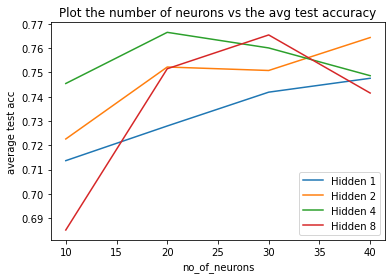

In [293]:
sns.lineplot(no_of_neurons, hidden_1)
sns.lineplot(no_of_neurons,hidden_2)
sns.lineplot(no_of_neurons,hidden_4)
sns.lineplot(no_of_neurons,hidden_8)
plt.title("Plot the number of neurons vs the avg test accuracy")
plt.xlabel('no_of_neurons')
plt.ylabel('average test acc')
plt.legend(['Hidden 1', 'Hidden 2', 'Hidden 4', 'Hidden 8'])
plt.show()


In [294]:
comp_train_acc_hidden=np.array([[np.mean(train_acc_1_10[-1]),np.mean(train_acc_1_20[-1]),np.mean(train_acc_1_30[-1]),np.mean(train_acc_1_40[-1])],
               [np.mean(train_acc_2_10[-1]),np.mean(train_acc_2_20[-1]),np.mean(train_acc_2_30[-1]),np.mean(train_acc_2_40[-1])],
               [np.mean(train_acc_4_10[-1]),np.mean(train_acc_4_20[-1]),np.mean(train_acc_4_30[-1]),np.mean(train_acc_4_40[-1])],
               [np.mean(train_acc_8_10[-1]),np.mean(train_acc_8_20[-1]),np.mean(train_acc_8_30[-1]),np.mean(train_acc_8_40[-1])]])
comp_test_acc_hidden=np.array([[np.mean(test_acc_1_10),np.mean(test_acc_1_20),np.mean(test_acc_1_30),np.mean(test_acc_1_40[-1])],
               [np.mean(test_acc_2_10),np.mean(test_acc_2_20),np.mean(test_acc_2_30),np.mean(test_acc_2_40)],
               [np.mean(test_acc_4_10),np.mean(test_acc_4_20),np.mean(test_acc_4_30),np.mean(test_acc_4_40)],
               [np.mean(test_acc_8_10),np.mean(test_acc_8_20),np.mean(test_acc_8_30),np.mean(test_acc_8_40)]])
comp_val_test=np.array([[np.mean(val_acc_1_10[-1]),np.mean(val_acc_1_20[-1]),np.mean(val_acc_1_30[-1]),np.mean(val_acc_1_40[-1])],
               [np.mean(val_acc_2_10[-1]),np.mean(val_acc_2_20[-1]),np.mean(val_acc_2_30[-1]),np.mean(val_acc_2_40[-1])],
               [np.mean(val_acc_4_10[-1]),np.mean(val_acc_4_20[-1]),np.mean(val_acc_4_30[-1]),np.mean(val_acc_4_40[-1])],
               [np.mean(val_acc_8_10[-1]),np.mean(val_acc_8_20[-1]),np.mean(val_acc_8_30[-1]),np.mean(val_acc_8_40[-1])]])

In [295]:
np.where(comp_train_acc_hidden==np.max(comp_train_acc_hidden))

(array([3], dtype=int64), array([3], dtype=int64))

In [296]:
np.where(comp_test_acc_hidden==np.max(comp_test_acc_hidden))

(array([2], dtype=int64), array([1], dtype=int64))

In [297]:
np.where(comp_val_test==np.max(comp_val_test))

(array([1], dtype=int64), array([3], dtype=int64))

# Q3.3

## Learning rate 0.1

### AdamW

In [348]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_A_1=[]
train_acc_A_1=[]
val_acc_A_1=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.1)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_A_1.append(test_acc)
  train_acc_A_1.append(result.history['accuracy'])
  val_acc_A_1.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 14.
Epoch 44: early stopping
18/18 [==============================] - 0s 589us/step - loss: 0.7545 - accuracy: 0.6916
Restoring model weights from the end of the best epoch: 9.
Epoch 39: early stopping
18/18 [==============================] - 0s 528us/step - loss: 1.1034 - accuracy: 0.6061
Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.8500 - accuracy: 0.6203
Restoring model weights from the end of the best epoch: 7.
Epoch 37: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.8235 - accuracy: 0.6720
Restoring model weights from the end of the best epoch: 28.
Epoch 58: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.8312 - accuracy: 0.6738


In [349]:
print("-----------Stat info of AdamW_LR=0.1-----------")
min_max2(test_acc_A_1,train_acc_A_1[-1],val_acc_A_1[-1])

-----------Stat info of AdamW_LR=0.1-----------
minimum test accuracy is 0.6060606241226196
maximum test accuracy is: 0.6916220784187317
average test accuracy is: 0.6527629137039185
minimum training accuracy is: 0.3921343982219696
maximum training accuracy is: 0.6704849004745483
average training accuracy is: 0.5570433540590878
minimum validation accuracy is: 0.34224599599838257
maximum validation accuracy is: 0.6844919919967651
average validation accuracy is: 0.5566414640895252


### SGD (momentum =0.1)

In [350]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD1_1=[]
train_acc_SGD1_1=[]
val_acc_SGD1_1=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=2,num_nerons=40,no_hidden_layers=4,learning_rat=0.1)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD1_1.append(test_acc)
  train_acc_SGD1_1.append(result.history['accuracy'])
  val_acc_SGD1_1.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 277.
Epoch 307: early stopping
18/18 [==============================] - 0s 528us/step - loss: 1.1943 - accuracy: 0.7433
Restoring model weights from the end of the best epoch: 251.
Epoch 281: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.9961 - accuracy: 0.7825
Restoring model weights from the end of the best epoch: 201.
Epoch 231: early stopping
18/18 [==============================] - 0s 571us/step - loss: 0.8284 - accuracy: 0.7647
Restoring model weights from the end of the best epoch: 270.
Epoch 300: early stopping
18/18 [==============================] - 0s 645us/step - loss: 1.0859 - accuracy: 0.7790
Restoring model weights from the end of the best epoch: 353.
Epoch 383: early stopping
18/18 [==============================] - 0s 587us/step - loss: 1.2484 - accuracy: 0.7094


In [351]:
print("-----------Stat info of SGD 0.1_LR=0.1-----------")
min_max2(test_acc_SGD1_1,train_acc_SGD1_1[-1],val_acc_SGD1_1[-1])

-----------Stat info of SGD 0.1_LR=0.1-----------
minimum test accuracy is 0.70944744348526
maximum test accuracy is: 0.782531201839447
average test accuracy is: 0.7557932376861572
minimum training accuracy is: 0.460862934589386
maximum training accuracy is: 0.9534173607826233
average training accuracy is: 0.8793193352440318
minimum validation accuracy is: 0.5686274766921997
maximum validation accuracy is: 0.8163992762565613
average validation accuracy is: 0.7677310660053482


### SGD (momentum =0.5)

In [352]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD2_1=[]
train_acc_SGD2_1=[]
val_acc_SGD2_1=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=3,num_nerons=40,no_hidden_layers=4,learning_rat=0.1)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD2_1.append(test_acc)
  train_acc_SGD2_1.append(result.history['accuracy'])
  val_acc_SGD2_1.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 254.
Epoch 284: early stopping
18/18 [==============================] - 0s 530us/step - loss: 1.0262 - accuracy: 0.7558
Restoring model weights from the end of the best epoch: 240.
Epoch 270: early stopping
18/18 [==============================] - 0s 528us/step - loss: 1.0771 - accuracy: 0.7932
Restoring model weights from the end of the best epoch: 345.
Epoch 375: early stopping
18/18 [==============================] - 0s 530us/step - loss: 1.2557 - accuracy: 0.7504
Restoring model weights from the end of the best epoch: 291.
Epoch 321: early stopping
18/18 [==============================] - 0s 588us/step - loss: 1.3223 - accuracy: 0.7237
Restoring model weights from the end of the best epoch: 381.
Epoch 411: early stopping
18/18 [==============================] - 0s 530us/step - loss: 1.4133 - accuracy: 0.7576


In [353]:
print("-----------Stat info of SGD 0.5_LR=0.1-----------")
min_max2(test_acc_SGD2_1,train_acc_SGD2_1[-1],val_acc_SGD2_1[-1])

-----------Stat info of SGD 0.5_LR=0.1-----------
minimum test accuracy is 0.7237076759338379
maximum test accuracy is: 0.7932263612747192
average test accuracy is: 0.7561497211456298
minimum training accuracy is: 0.5135548114776611
maximum training accuracy is: 0.9713631272315979
average training accuracy is: 0.900076086213699
minimum validation accuracy is: 0.6363636255264282
maximum validation accuracy is: 0.8146167397499084
average validation accuracy is: 0.7552857889166134


### SGD (momentum =0.9)

In [354]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD3_1=[]
train_acc_SGD3_1=[]
val_acc_SGD3_1=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=4,num_nerons=40,no_hidden_layers=4,learning_rat=0.1)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD3_1.append(test_acc)
  train_acc_SGD3_1.append(result.history['accuracy'])
  val_acc_SGD3_1.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 72.
Epoch 102: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5414 - accuracy: 0.8039
Restoring model weights from the end of the best epoch: 35.
Epoch 65: early stopping
18/18 [==============================] - 0s 559us/step - loss: 0.5778 - accuracy: 0.7415
Restoring model weights from the end of the best epoch: 33.
Epoch 63: early stopping
18/18 [==============================] - 0s 521us/step - loss: 0.6133 - accuracy: 0.7701
Restoring model weights from the end of the best epoch: 40.
Epoch 70: early stopping
18/18 [==============================] - 0s 546us/step - loss: 0.5918 - accuracy: 0.7683
Restoring model weights from the end of the best epoch: 28.
Epoch 58: early stopping
18/18 [==============================] - 0s 547us/step - loss: 0.5721 - accuracy: 0.7897


In [355]:
print("-----------Stat info of SGD 0.9_LR=0.1-----------")
min_max2(test_acc_SGD3_1[-1],train_acc_SGD3_1[-1],val_acc_SGD3_1[-1])

-----------Stat info of SGD 0.9_LR=0.1-----------
minimum test accuracy is 0.7896613478660583
maximum test accuracy is: 0.7896613478660583
average test accuracy is: 0.7896613478660583
minimum training accuracy is: 0.2329133301973343
maximum training accuracy is: 0.7945780754089355
average training accuracy is: 0.5647917731568731
minimum validation accuracy is: 0.2192513346672058
maximum validation accuracy is: 0.7985739707946777
average validation accuracy is: 0.5500952750444412


### Rprop

In [356]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_rprop_1=[]
train_acc_rprop_1=[]
val_acc_rprop_1=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=5,num_nerons=40,no_hidden_layers=4,learning_rat=0.1)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_rprop_1.append(test_acc)
  train_acc_rprop_1.append(result.history['accuracy'])
  val_acc_rprop_1.append(result.history['val_accuracy'])

18/18 [==============================] - 0s 528us/step - loss: 2.2697 - accuracy: 0.7094
Restoring model weights from the end of the best epoch: 176.
Epoch 206: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.7958 - accuracy: 0.7665
Restoring model weights from the end of the best epoch: 450.
Epoch 480: early stopping
18/18 [==============================] - 0s 530us/step - loss: 2.2045 - accuracy: 0.7504
Restoring model weights from the end of the best epoch: 247.
Epoch 277: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 1.2173 - accuracy: 0.7754
Restoring model weights from the end of the best epoch: 428.
Epoch 458: early stopping
18/18 [==============================] - 0s 530us/step - loss: 1.9747 - accuracy: 0.6898


In [357]:
print("-----------Stat info of rprop_LR=0.1-----------")
min_max2(test_acc_SGD3_1[-1],train_acc_SGD3_1[-1],val_acc_SGD3_1[-1])

-----------Stat info of rprop_LR=0.1-----------
minimum test accuracy is 0.7896613478660583
maximum test accuracy is: 0.7896613478660583
average test accuracy is: 0.7896613478660583
minimum training accuracy is: 0.2329133301973343
maximum training accuracy is: 0.7945780754089355
average training accuracy is: 0.5647917731568731
minimum validation accuracy is: 0.2192513346672058
maximum validation accuracy is: 0.7985739707946777
average validation accuracy is: 0.5500952750444412


## Learning rete 0.01

### AdamW

In [358]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_A_01=[]
train_acc_A_01=[]
val_acc_A_01=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.01)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_A_01.append(test_acc)
  train_acc_A_01.append(result.history['accuracy'])
  val_acc_A_01.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 112.
Epoch 142: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.4751 - accuracy: 0.7861
Restoring model weights from the end of the best epoch: 84.
Epoch 114: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5338 - accuracy: 0.7879
Restoring model weights from the end of the best epoch: 42.
Epoch 72: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5605 - accuracy: 0.7487
Restoring model weights from the end of the best epoch: 81.
Epoch 111: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5568 - accuracy: 0.7861
Restoring model weights from the end of the best epoch: 156.
Epoch 186: early stopping
18/18 [==============================] - 0s 585us/step - loss: 0.4962 - accuracy: 0.7968


In [359]:
print("-----------Stat info of AdamW_LR=0.01-----------")
min_max2(test_acc_A_01,train_acc_A_01[-1],val_acc_A_01[-1])

-----------Stat info of AdamW_LR=0.01-----------
minimum test accuracy is 0.7486631274223328
maximum test accuracy is: 0.7967914342880249
average test accuracy is: 0.7811051845550537
minimum training accuracy is: 0.5357006788253784
maximum training accuracy is: 0.8434516787528992
average training accuracy is: 0.8050988015308175
minimum validation accuracy is: 0.6434937715530396
maximum validation accuracy is: 0.8217468857765198
average validation accuracy is: 0.7607191448570579


### SGD (momentum =0.1)

In [360]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD1_01=[]
train_acc_SGD1_01=[]
val_acc_SGD1_01=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=2,num_nerons=40,no_hidden_layers=4,learning_rat=0.01)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD1_01.append(test_acc)
  train_acc_SGD1_01.append(result.history['accuracy'])
  val_acc_SGD1_01.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 266.
Epoch 296: early stopping
18/18 [==============================] - 0s 531us/step - loss: 0.5606 - accuracy: 0.7718
Restoring model weights from the end of the best epoch: 353.
Epoch 383: early stopping
18/18 [==============================] - 0s 611us/step - loss: 0.5667 - accuracy: 0.7736
Restoring model weights from the end of the best epoch: 372.
Epoch 402: early stopping
18/18 [==============================] - 0s 526us/step - loss: 0.6137 - accuracy: 0.7362
Restoring model weights from the end of the best epoch: 448.
Epoch 478: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.7617 - accuracy: 0.7041
Restoring model weights from the end of the best epoch: 261.
Epoch 291: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.6289 - accuracy: 0.7291


In [361]:
print("-----------Stat info of SGD 0.1_LR=0.01-----------")
min_max2(test_acc_SGD1_01,train_acc_SGD1_01[-1],val_acc_SGD1_01[-1])

-----------Stat info of SGD 0.1_LR=0.01-----------
minimum test accuracy is 0.7040998339653015
maximum test accuracy is: 0.7736185193061829
average test accuracy is: 0.7429589986801147
minimum training accuracy is: 0.25620466470718384
maximum training accuracy is: 0.8472699522972107
average training accuracy is: 0.7839670183322683
minimum validation accuracy is: 0.3333333432674408
maximum validation accuracy is: 0.7967914342880249
average validation accuracy is: 0.7426171960289946


### SGD (momentum =0.5)

In [362]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD2_01=[]
train_acc_SGD2_01=[]
val_acc_SGD2_01=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=3,num_nerons=40,no_hidden_layers=4,learning_rat=0.01)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD2_01.append(test_acc)
  train_acc_SGD2_01.append(result.history['accuracy'])
  val_acc_SGD2_01.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 347.
Epoch 377: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.8687 - accuracy: 0.7665
Restoring model weights from the end of the best epoch: 250.
Epoch 280: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6299 - accuracy: 0.7219
Restoring model weights from the end of the best epoch: 280.
Epoch 310: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.6199 - accuracy: 0.7932
Restoring model weights from the end of the best epoch: 414.
Epoch 444: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.8880 - accuracy: 0.6988


In [363]:
print("-----------Stat info of SGD 0.5_LR=0.01-----------")
min_max2(test_acc_SGD2_01,train_acc_SGD2_01[-1],val_acc_SGD2_01[-1])

-----------Stat info of SGD 0.5_LR=0.01-----------
minimum test accuracy is 0.698752224445343
maximum test accuracy is: 0.7932263612747192
average test accuracy is: 0.7411764740943909
minimum training accuracy is: 0.2100038230419159
maximum training accuracy is: 0.8961435556411743
average training accuracy is: 0.8290764996194625
minimum validation accuracy is: 0.34581103920936584
maximum validation accuracy is: 0.7860962748527527
average validation accuracy is: 0.7387668402479576


### SGD (momentum =0.9)

In [364]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD3_01=[]
train_acc_SGD3_01=[]
val_acc_SGD3_01=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=4,num_nerons=40,no_hidden_layers=4,learning_rat=0.01)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD3_01.append(test_acc)
  train_acc_SGD3_01.append(result.history['accuracy'])
  val_acc_SGD3_01.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 381.
Epoch 411: early stopping
18/18 [==============================] - 0s 528us/step - loss: 1.3484 - accuracy: 0.7487
Restoring model weights from the end of the best epoch: 402.
Epoch 432: early stopping
18/18 [==============================] - 0s 587us/step - loss: 1.3810 - accuracy: 0.7718
Restoring model weights from the end of the best epoch: 287.
Epoch 317: early stopping
18/18 [==============================] - 0s 647us/step - loss: 1.0320 - accuracy: 0.7594
Restoring model weights from the end of the best epoch: 281.
Epoch 311: early stopping
18/18 [==============================] - 0s 530us/step - loss: 1.1311 - accuracy: 0.7825
Restoring model weights from the end of the best epoch: 312.
Epoch 342: early stopping
18/18 [==============================] - 0s 527us/step - loss: 1.1745 - accuracy: 0.7308


In [365]:
print("-----------Stat info of SGD 0.9_LR=0.01-----------")
min_max2(test_acc_SGD3_01,train_acc_SGD3_01[-1],val_acc_SGD3_01[-1])

-----------Stat info of SGD 0.9_LR=0.01-----------
minimum test accuracy is 0.7308377623558044
maximum test accuracy is: 0.782531201839447
average test accuracy is: 0.7586452722549438
minimum training accuracy is: 0.3768613934516907
maximum training accuracy is: 0.947689950466156
average training accuracy is: 0.8755328242193189
minimum validation accuracy is: 0.5169340372085571
maximum validation accuracy is: 0.8092691898345947
average validation accuracy is: 0.7546152943059018


### Rprop

In [366]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_rprop_01=[]
train_acc_rprop_01=[]
val_acc_rprop_01=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=5,num_nerons=40,no_hidden_layers=4,learning_rat=0.01)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_rprop_01.append(test_acc)
  train_acc_rprop_01.append(result.history['accuracy'])
  val_acc_rprop_01.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 397.
Epoch 427: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 2.1094 - accuracy: 0.7398
Restoring model weights from the end of the best epoch: 400.
Epoch 430: early stopping
18/18 [==============================] - 0s 587us/step - loss: 1.3963 - accuracy: 0.7736
Restoring model weights from the end of the best epoch: 440.
Epoch 470: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 2.6586 - accuracy: 0.6970


In [367]:
print("-----------Stat info of rprop_01_LR=0.01-----------")
min_max2(test_acc_rprop_01,train_acc_rprop_01[-1],val_acc_rprop_01[-1])

-----------Stat info of rprop_01_LR=0.01-----------
minimum test accuracy is 0.6969696879386902
maximum test accuracy is: 0.7736185193061829
average test accuracy is: 0.7354723691940308
minimum training accuracy is: 0.4532264173030853
maximum training accuracy is: 0.9427262544631958
average training accuracy is: 0.8830691102147102
minimum validation accuracy is: 0.6007130146026611
maximum validation accuracy is: 0.7860962748527527
average validation accuracy is: 0.7259999998807907


## Learning rete 0.001

### AdamW

In [368]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_A_001=[]
train_acc_A_001=[]
val_acc_A_001=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.001)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_A_001.append(test_acc)
  train_acc_A_001.append(result.history['accuracy'])
  val_acc_A_001.append(result.history['val_accuracy'])


Restoring model weights from the end of the best epoch: 88.
Epoch 118: early stopping
18/18 [==============================] - 0s 537us/step - loss: 0.5922 - accuracy: 0.7077
Restoring model weights from the end of the best epoch: 147.
Epoch 177: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5456 - accuracy: 0.7825
Restoring model weights from the end of the best epoch: 47.
Epoch 77: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5671 - accuracy: 0.7504
Restoring model weights from the end of the best epoch: 52.
Epoch 82: early stopping
18/18 [==============================] - 0s 585us/step - loss: 0.5936 - accuracy: 0.7433
Restoring model weights from the end of the best epoch: 101.
Epoch 131: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5563 - accuracy: 0.7487


In [369]:
print("-----------Stat info of AdamW_LR=0.001-----------")
min_max2(test_acc_A_001,train_acc_A_001[-1],val_acc_A_001[-1])

-----------Stat info of AdamW_LR=0.001-----------
minimum test accuracy is 0.7076649069786072
maximum test accuracy is: 0.782531201839447
average test accuracy is: 0.7465240716934204
minimum training accuracy is: 0.34516990184783936
maximum training accuracy is: 0.7930507659912109
average training accuracy is: 0.7684070317799808
minimum validation accuracy is: 0.4795008897781372
maximum validation accuracy is: 0.7771835923194885
average validation accuracy is: 0.7372603452842654


### SGD (momentum =0.1)

In [370]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD1_001=[]
train_acc_SGD1_001=[]
val_acc_SGD1_001=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=2,num_nerons=40,no_hidden_layers=4,learning_rat=0.001)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD1_001.append(test_acc)
  train_acc_SGD1_001.append(result.history['accuracy'])
  val_acc_SGD1_001.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 333.
Epoch 363: early stopping
18/18 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.7184


In [371]:
print("-----------Stat info of SGD 0.1_LR=0.01-----------")
min_max2(test_acc_SGD1_001,train_acc_SGD1_001[-1],val_acc_SGD1_001[-1])

-----------Stat info of SGD 0.1_LR=0.01-----------
minimum test accuracy is 0.7147949934005737
maximum test accuracy is: 0.7361853718757629
average test accuracy is: 0.7240641593933106
minimum training accuracy is: 0.256586492061615
maximum training accuracy is: 0.7460862994194031
average training accuracy is: 0.6449522716403008
minimum validation accuracy is: 0.27272728085517883
maximum validation accuracy is: 0.7308377623558044
average validation accuracy is: 0.6543101651072503


### SGD (momentum =0.5)

In [372]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD2_001=[]
train_acc_SGD2_001=[]
val_acc_SGD2_001=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=3,num_nerons=40,no_hidden_layers=4,learning_rat=0.001)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD2_001.append(test_acc)
  train_acc_SGD2_001.append(result.history['accuracy'])
  val_acc_SGD2_001.append(result.history['val_accuracy'])

18/18 [==============================] - 0s 419us/step - loss: 0.5884 - accuracy: 0.7451
Restoring model weights from the end of the best epoch: 431.
Epoch 461: early stopping
18/18 [==============================] - 0s 618us/step - loss: 0.5809 - accuracy: 0.7380


In [373]:
print("-----------Stat info of SGD 0.5_LR=0.001-----------")
min_max2(test_acc_SGD2_001,train_acc_SGD2_001[-1],val_acc_SGD2_001[-1])

-----------Stat info of SGD 0.5_LR=0.001-----------
minimum test accuracy is 0.7272727489471436
maximum test accuracy is: 0.7557932138442993
average test accuracy is: 0.7433155059814454
minimum training accuracy is: 0.1821305900812149
maximum training accuracy is: 0.7754868268966675
average training accuracy is: 0.7025001910030841
minimum validation accuracy is: 0.20142602920532227
maximum validation accuracy is: 0.7468805909156799
average validation accuracy is: 0.6922531170248986


### SGD (momentum =0.9)

In [374]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_SGD3_001=[]
train_acc_SGD3_001=[]
val_acc_SGD3_001=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=4,num_nerons=40,no_hidden_layers=4,learning_rat=0.001)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_SGD3_001.append(test_acc)
  train_acc_SGD3_001.append(result.history['accuracy'])
  val_acc_SGD3_001.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 408.
Epoch 438: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5759 - accuracy: 0.7736
Restoring model weights from the end of the best epoch: 439.
Epoch 469: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.6612 - accuracy: 0.7469
Restoring model weights from the end of the best epoch: 445.
Epoch 475: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.6679 - accuracy: 0.7112
Restoring model weights from the end of the best epoch: 414.
Epoch 444: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.6797 - accuracy: 0.7130
Restoring model weights from the end of the best epoch: 360.
Epoch 390: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5779 - accuracy: 0.7968


In [375]:
print("-----------Stat info of SGD 0.9_LR=0.001-----------")
min_max2(test_acc_SGD3_001,train_acc_SGD3_001[-1],val_acc_SGD3_001[-1])

-----------Stat info of SGD 0.9_LR=0.001-----------
minimum test accuracy is 0.7112299203872681
maximum test accuracy is: 0.7967914342880249
average test accuracy is: 0.7483065843582153
minimum training accuracy is: 0.1584574282169342
maximum training accuracy is: 0.8484154343605042
average training accuracy is: 0.7804740499991637
minimum validation accuracy is: 0.25846701860427856
maximum validation accuracy is: 0.7950088977813721
average validation accuracy is: 0.7434800489590718


### Rprop

In [376]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_rprop_001=[]
train_acc_rprop_001=[]
val_acc_rprop_001=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,optim=5,num_nerons=40,no_hidden_layers=4,learning_rat=0.001)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_rprop_001.append(test_acc)
  train_acc_rprop_001.append(result.history['accuracy'])
  val_acc_rprop_001.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 253.
Epoch 283: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.9154 - accuracy: 0.7986
Restoring model weights from the end of the best epoch: 269.
Epoch 299: early stopping
18/18 [==============================] - 0s 528us/step - loss: 1.1702 - accuracy: 0.7611
Restoring model weights from the end of the best epoch: 171.
Epoch 201: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.8783 - accuracy: 0.7273
Restoring model weights from the end of the best epoch: 367.
Epoch 397: early stopping
18/18 [==============================] - 0s 528us/step - loss: 1.3025 - accuracy: 0.7629
Restoring model weights from the end of the best epoch: 414.
Epoch 444: early stopping
18/18 [==============================] - 0s 590us/step - loss: 1.7756 - accuracy: 0.7504


In [377]:
print("-----------Stat info of rprop_01_LR=0.001-----------")
min_max2(test_acc_rprop_001,train_acc_rprop_001[-1],val_acc_rprop_001[-1])

-----------Stat info of rprop_01_LR=0.001-----------
minimum test accuracy is 0.7272727489471436
maximum test accuracy is: 0.7985739707946777
average test accuracy is: 0.7600713014602661
minimum training accuracy is: 0.4238258898258209
maximum training accuracy is: 0.9495990872383118
average training accuracy is: 0.8919280106285671
minimum validation accuracy is: 0.5597147941589355
maximum validation accuracy is: 0.7985739707946777
average validation accuracy is: 0.7430906851549406


## combination

In [380]:
comp_train_acc_optimizer=np.array([[np.mean(train_acc_A_1[-1]),np.mean(train_acc_SGD1_1[-1]),np.mean(train_acc_SGD2_1[-1]),np.mean(train_acc_SGD3_1[-1]),np.mean(train_acc_rprop_1[-1])],
               [np.mean(train_acc_A_01[-1]),np.mean(train_acc_SGD1_01[-1]),np.mean(train_acc_SGD2_01[-1]),np.mean(train_acc_SGD3_01[-1]),np.mean(train_acc_rprop_01[-1])],
               [np.mean(train_acc_A_001[-1]),np.mean(train_acc_SGD1_001[-1]),np.mean(train_acc_SGD2_001[-1]),np.mean(train_acc_SGD3_001[-1]),np.mean(train_acc_rprop_001[-1])]])

comp_test_acc_optimizer=np.array([[np.mean(test_acc_A_1),np.mean(test_acc_SGD1_1),np.mean(test_acc_SGD2_1),np.mean(test_acc_SGD3_1),np.mean(test_acc_rprop_1)],
               [np.mean(test_acc_A_01),np.mean(test_acc_SGD1_01),np.mean(test_acc_SGD2_01),np.mean(test_acc_SGD3_01),np.mean(test_acc_rprop_01)],
               [np.mean(test_acc_A_001),np.mean(test_acc_SGD1_001),np.mean(test_acc_SGD2_001),np.mean(test_acc_SGD3_001),np.mean(test_acc_rprop_001)]])

comp_val_test_optimizer=np.array([[np.mean(val_acc_A_1[-1]),np.mean(val_acc_SGD1_1[-1]),np.mean(val_acc_SGD2_1[-1]),np.mean(val_acc_SGD3_1[-1]),np.mean(val_acc_rprop_1[-1])],
               [np.mean(val_acc_A_01[-1]),np.mean(val_acc_SGD1_01[-1]),np.mean(val_acc_SGD2_01[-1]),np.mean(val_acc_SGD3_01[-1]),np.mean(val_acc_rprop_01[-1])],
               [np.mean(val_acc_A_001[-1]),np.mean(val_acc_SGD1_001[-1]),np.mean(val_acc_SGD2_001[-1]),np.mean(val_acc_SGD3_001[-1]),np.mean(val_acc_rprop_001[-1])]])

In [381]:
np.where(comp_train_acc_optimizer==np.max(comp_train_acc_optimizer))

(array([0], dtype=int64), array([2], dtype=int64))

In [400]:
np.max(comp_train_acc_optimizer)

0.900076086213699

In [382]:
np.where(comp_test_acc_optimizer==np.max(comp_test_acc_optimizer))

(array([1], dtype=int64), array([0], dtype=int64))

In [402]:
np.max(comp_test_acc_optimizer)

0.7811051845550537

In [383]:
np.where(comp_val_test_optimizer==np.max(comp_val_test_optimizer))

(array([0], dtype=int64), array([1], dtype=int64))

In [403]:
np.max(comp_val_test_optimizer)

0.7677310660053482

## Q3.4

### RELU

In [412]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_relu=[]
train_acc_relu=[]
val_acc_relu=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.01)
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_relu.append(test_acc)
  train_acc_relu.append(result.history['accuracy'])
  val_acc_relu.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 90.
Epoch 120: early stopping
18/18 [==============================] - 0s 537us/step - loss: 0.5005 - accuracy: 0.8164
Restoring model weights from the end of the best epoch: 41.
Epoch 71: early stopping
18/18 [==============================] - 0s 585us/step - loss: 0.6376 - accuracy: 0.7504
Restoring model weights from the end of the best epoch: 129.
Epoch 159: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5282 - accuracy: 0.7718
Restoring model weights from the end of the best epoch: 51.
Epoch 81: early stopping
18/18 [==============================] - 0s 589us/step - loss: 0.5205 - accuracy: 0.7611
Restoring model weights from the end of the best epoch: 148.
Epoch 178: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5293 - accuracy: 0.7790


In [413]:
print("-----------Stat info of relu-----------")
min_max2(test_acc_relu,train_acc_relu[-1],val_acc_relu[-1])

-----------Stat info of relu-----------
minimum test accuracy is 0.7504456043243408
maximum test accuracy is: 0.8163992762565613
average test accuracy is: 0.7757575631141662
minimum training accuracy is: 0.5937380790710449
maximum training accuracy is: 0.8327605724334717
average training accuracy is: 0.8056660274441323
minimum validation accuracy is: 0.6809269189834595
maximum validation accuracy is: 0.8110516667366028
average validation accuracy is: 0.7633339327372862


### leaky relu

In [415]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_leakyrelu=[]
train_acc_leakyrelu=[]
val_acc_leakyrelu=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.01,activation_fun=tf.keras.layers.LeakyReLU(alpha=0.3))
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_leakyrelu.append(test_acc)
  train_acc_leakyrelu.append(result.history['accuracy'])
  val_acc_leakyrelu.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 48.
Epoch 78: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5110 - accuracy: 0.8021
Restoring model weights from the end of the best epoch: 99.
Epoch 129: early stopping
18/18 [==============================] - 0s 548us/step - loss: 0.5371 - accuracy: 0.7950
Restoring model weights from the end of the best epoch: 53.
Epoch 83: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5542 - accuracy: 0.7380
Restoring model weights from the end of the best epoch: 98.
Epoch 128: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5372 - accuracy: 0.7415
Restoring model weights from the end of the best epoch: 74.
Epoch 104: early stopping
18/18 [==============================] - 0s 586us/step - loss: 0.5322 - accuracy: 0.7843


In [416]:
print("-----------Stat info of leaky relu-----------")
min_max2(test_acc_leakyrelu,train_acc_leakyrelu[-1],val_acc_leakyrelu[-1])

-----------Stat info of leaky relu-----------
minimum test accuracy is 0.7379679083824158
maximum test accuracy is: 0.8021390438079834
average test accuracy is: 0.7721925139427185
minimum training accuracy is: 0.6063383221626282
maximum training accuracy is: 0.8048873543739319
average training accuracy is: 0.7738053265672463
minimum validation accuracy is: 0.6434937715530396
maximum validation accuracy is: 0.8074866533279419
average validation accuracy is: 0.7616207341735179


### sigmoid

In [417]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_sigmoid=[]
train_acc_sigmoid=[]
val_acc_sigmoid=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.01,activation_fun='sigmoid')
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_sigmoid.append(test_acc)
  train_acc_sigmoid.append(result.history['accuracy'])
  val_acc_sigmoid.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 30.
Epoch 60: early stopping
18/18 [==============================] - 0s 500us/step - loss: 0.5662 - accuracy: 0.7897
Restoring model weights from the end of the best epoch: 76.
Epoch 106: early stopping
18/18 [==============================] - 0s 616us/step - loss: 0.6023 - accuracy: 0.7219
Restoring model weights from the end of the best epoch: 114.
Epoch 144: early stopping
18/18 [==============================] - 0s 526us/step - loss: 0.6237 - accuracy: 0.6988
Restoring model weights from the end of the best epoch: 103.
Epoch 133: early stopping
18/18 [==============================] - 0s 530us/step - loss: 0.5932 - accuracy: 0.7629
Restoring model weights from the end of the best epoch: 122.
Epoch 152: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5709 - accuracy: 0.7469


In [418]:
print("-----------Stat info of sigmoid-----------")
min_max2(test_acc_sigmoid,train_acc_sigmoid[-1],val_acc_sigmoid[-1])

-----------Stat info of sigmoid-----------
minimum test accuracy is 0.698752224445343
maximum test accuracy is: 0.7896613478660583
average test accuracy is: 0.7440285325050354
minimum training accuracy is: 0.303932785987854
maximum training accuracy is: 0.7747231721878052
average training accuracy is: 0.7443881756380984
minimum validation accuracy is: 0.46167558431625366
maximum validation accuracy is: 0.7843137383460999
average validation accuracy is: 0.7331832247345071


### Tanh

In [419]:
#no_epoch,x_train,y_train,x_validation,y_validation,b_size=32,optim=1,
#num_nerons=10,no_hidden_layers=1,learning_rat=.001,activation_fun='relu'):
test_acc_tanh=[]
train_acc_tanh=[]
val_acc_tanh=[]
for i in range(5):
  NN_model,result = general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.01,activation_fun='tanh')
  test_loss,test_acc = model_evaluate(NN_model,XX_testing_df,y_test)
  test_acc_tanh.append(test_acc)
  train_acc_tanh.append(result.history['accuracy'])
  val_acc_tanh.append(result.history['val_accuracy'])

Restoring model weights from the end of the best epoch: 73.
Epoch 103: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5560 - accuracy: 0.7433
Restoring model weights from the end of the best epoch: 275.
Epoch 305: early stopping
18/18 [==============================] - 0s 524us/step - loss: 0.5400 - accuracy: 0.7843
Restoring model weights from the end of the best epoch: 119.
Epoch 149: early stopping
18/18 [==============================] - 0s 559us/step - loss: 0.4900 - accuracy: 0.8004
Restoring model weights from the end of the best epoch: 221.
Epoch 251: early stopping
18/18 [==============================] - 0s 528us/step - loss: 0.5499 - accuracy: 0.7807
Restoring model weights from the end of the best epoch: 289.
Epoch 319: early stopping
18/18 [==============================] - 0s 587us/step - loss: 0.5610 - accuracy: 0.7843


In [420]:
print("-----------Stat info of tanh-----------")
min_max2(test_acc_tanh,train_acc_tanh[-1],val_acc_tanh[-1])

-----------Stat info of tanh-----------
minimum test accuracy is 0.7433155179023743
maximum test accuracy is: 0.8003565073013306
average test accuracy is: 0.7786096334457397
minimum training accuracy is: 0.6204658150672913
maximum training accuracy is: 0.8636884093284607
average training accuracy is: 0.8199652625849254
minimum validation accuracy is: 0.6310160160064697
maximum validation accuracy is: 0.8253119587898254
average validation accuracy is: 0.771070468388381


### compare

In [421]:
comp_train_acc_af=[np.mean(train_acc_relu[-1]),np.mean(train_acc_leakyrelu[-1]),np.mean(train_acc_sigmoid[-1]),np.mean(train_acc_tanh[-1])]
comp_test_acc_af=[np.mean(test_acc_relu),np.mean(test_acc_leakyrelu),np.mean(test_acc_sigmoid),np.mean(test_acc_tanh)]
comp_val_test_af=[np.mean(val_acc_relu[-1]),np.mean(val_acc_leakyrelu[-1]),np.mean(val_acc_sigmoid[-1]),np.mean(val_acc_tanh[-1])]

In [422]:
np.where(comp_train_acc_af==np.max(comp_train_acc_af))

(array([3], dtype=int64),)

In [423]:
np.where(comp_test_acc_af==np.max(comp_test_acc_af))

(array([3], dtype=int64),)

In [424]:
np.where(comp_val_test_af==np.max(comp_val_test_af))

(array([3], dtype=int64),)

# provide the confusion matrix. 

In [425]:
final_NN_model,final_result =  general_model(500,XX_train_df,y_train,XX_validation_df,y_val,b_size=64,num_nerons=40,no_hidden_layers=4,learning_rat=0.01,activation_fun='tanh')
final_val_loss,final_val_acc = model_evaluate(final_NN_model,XX_testing_df,y_test)

Restoring model weights from the end of the best epoch: 101.
Epoch 131: early stopping
18/18 [==============================] - 0s 645us/step - loss: 0.5072 - accuracy: 0.8128


In [426]:
final_y_predict=final_NN_model.predict(XX_testing_df)

In [427]:
final_y_predict

array([[1.2529731e-02, 5.1433197e-03, 7.2443311e-07, 2.1479124e-02,
        4.0601417e-01, 5.5483288e-01],
       [4.5688682e-07, 3.6744132e-06, 9.9887639e-01, 2.2128517e-04,
        7.4838888e-04, 1.4980444e-04],
       [9.2969378e-03, 1.8669079e-03, 1.2130215e-06, 8.5348776e-03,
        4.7604984e-01, 5.0425029e-01],
       ...,
       [8.8502802e-03, 3.1139129e-03, 4.5604170e-07, 3.3546429e-02,
        4.6352753e-01, 4.9096137e-01],
       [1.9786147e-02, 5.4503651e-03, 3.7398695e-07, 5.2937549e-03,
        4.3339846e-01, 5.3607094e-01],
       [3.4006352e-03, 1.0273980e-03, 4.7142504e-07, 9.8477574e-03,
        1.1253863e-01, 8.7318510e-01]], dtype=float32)

In [428]:
final_predict=[]
for pre in final_y_predict:
  final_predict.append(list(pre).index(max(pre)))

In [429]:
final_predict[0]

5

In [430]:
final_cm = confusion_matrix(y_tes, final_predict)

In [431]:
final_cm

array([[105,  14,   0,   0,   0,   3],
       [ 21,  68,   0,   0,   0,   1],
       [  0,   0,  48,   0,   1,   0],
       [  3,   2,   0,   4,   1,   7],
       [  0,   4,   0,   5,  83,  35],
       [  0,   0,   0,   3,   5, 148]], dtype=int64)

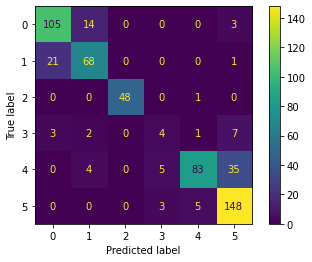

In [432]:
print(ConfusionMatrixDisplay(final_cm).plot())